<a href="https://colab.research.google.com/github/ipeirotis/dealing_with_data/blob/master/03-Pandas/A1-Introduction_to_Pandas_with_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pandas

## Setup and preliminaries

We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
!sudo pip3 install -U -q PyMySQL sqlalchemy sql_magic

In [2]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [4]:
# Make the graphs a bit bigger
matplotlib.style.use(["seaborn-talk", "seaborn-ticks", "seaborn-whitegrid"])

# Loading Data

## From CSV Files

We will use a dataset with [restaurant inspection results in NYC](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j).

We fetch it by executing the following command:

In [5]:
import os
from sqlalchemy import create_engine

conn_string = 'mysql+pymysql://{user}:{password}@{host}/{db}?charset=utf8mb4'.format(
    host = 'db.ipeirotis.org', 
    user = 'student',
    password = 'dwdstudent2015', 
    db = 'doh_restaurants',
    encoding = 'utf8mb4')

engine = create_engine(conn_string)
con = engine.connect()

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [6]:
import pandas as pd


# This query returns back the restaurants in the DOH database

sql = '''
	SELECT R.CAMIS, R.DBA, R.BUILDING, R.STREET, R.ZIPCODE, R.BORO, 
          R.CUISINE_DESCRIPTION, R.LATITUDE, R.LONGITUDE
		FROM restaurants R

'''

restaurants = pd.read_sql(sql, con=con)

In [7]:
# This query returns back the results and violations captured in the 
# latest inspection of each restaurant

sql = '''
  WITH latest_inspection AS (
		SELECT CAMIS, MAX(INSPECTION_DATE) AS INSPECTION_DATE FROM inspections
		GROUP BY CAMIS
	)
	SELECT R.CAMIS, R.DBA, R.ZIPCODE, R.BORO,
          I.INSPECTION_DATE, I.INSPECTION_ID, I.INSPECTION_TYPE, 
          V.VIOLATION_CODE, I.SCORE, I.GRADE
		FROM restaurants R
			JOIN latest_inspection L ON R.CAMIS = L.CAMIS
			JOIN inspections I ON I.CAMIS = L.CAMIS AND L.INSPECTION_DATE = I.INSPECTION_DATE
			JOIN violations V ON I.INSPECTION_ID = V.INSPECTION_ID
'''

inspections = pd.read_sql(sql, con=con)

When you run your query using Pandas, you get back a kind of object called a DataFrame, which is made up of rows and columns. Let's take a look at how the object looks like:

In [8]:
restaurants.head(5)

,CAMIS,DBA,BUILDING,STREET,ZIPCODE,BORO,CUISINE_DESCRIPTION,LATITUDE,LONGITUDE
0,30075445,MORRIS PARK BAKE SHOP,1007,MORRIS PARK AVENUE,10462,Bronx,Bakery Products/Desserts,40.8482,-73.8560
1,30112340,WENDY'S,469,FLATBUSH AVENUE,11225,Brooklyn,Hamburgers,40.6627,-73.9621
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,351,WEST 57 STREET,10019,Manhattan,Irish,40.7673,-73.9843
3,40356018,RIVIERA CATERERS,2780,STILLWELL AVENUE,11224,Brooklyn,American,40.5799,-73.9821
4,40356483,WILKEN'S FINE FOOD,7114,AVENUE U,11234,Brooklyn,Sandwiches,40.6201,-73.9070


In [9]:
inspections.head(5)

,CAMIS,DBA,ZIPCODE,BORO,INSPECTION_DATE,INSPECTION_ID,INSPECTION_TYPE,VIOLATION_CODE,SCORE,GRADE
0,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,2021-08-10,56198,Initial Inspection,06E,5,A
1,30112340,WENDY'S,11225,Brooklyn,2021-08-05,55913,Re-inspection,08A,16,B
2,30112340,WENDY'S,11225,Brooklyn,2021-08-05,55913,Re-inspection,02G,16,B
3,30112340,WENDY'S,11225,Brooklyn,2021-08-05,55913,Re-inspection,04N,16,B
4,30191841,DJ REYNOLDS PUB AND RESTAURANT,10019,Manhattan,2022-01-04,59053,Initial Inspection,10B,12,A


# Data Types and Conversions

## Data Types using `.dtypes`

We can also check the data types for each column

In [10]:
restaurants.dtypes

CAMIS                   object
DBA                     object
BUILDING                object
STREET                  object
ZIPCODE                 object
BORO                    object
CUISINE_DESCRIPTION     object
LATITUDE               float64
LONGITUDE              float64
dtype: object

### Exercise

Get the data types for the "inspections"

In [11]:
# your code here

## Data Types using `.describe()`

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [12]:
restaurants.describe(include='all')

,CAMIS,DBA,BUILDING,STREET,ZIPCODE,BORO,CUISINE_DESCRIPTION,LATITUDE,LONGITUDE
count,18905,18901,18905,18905,18905,18905,18905,18903.000000,18903.000000
unique,18905,15280,6241,1940,216,5,85,NaN,NaN
top,30075445,DUNKIN,1,BROADWAY,10019,Manhattan,American,NaN,NaN
freq,1,387,157,723,483,7385,3982,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.729658,-73.942936
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068856,0.075936
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.508100,-74.248700
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.689500,-73.989200
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.735400,-73.958900
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.763200,-73.902200


In [13]:
# Same as above, but the .T command transposes the table
restaurants.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CAMIS,18905,18905,30075445,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DBA,18901,15280,DUNKIN,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING,18905,6241,1,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STREET,18905,1940,BROADWAY,723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIPCODE,18905,216,10019,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BORO,18905,5,Manhattan,7385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUISINE_DESCRIPTION,18905,85,American,3982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LATITUDE,18903.0,NaN,NaN,NaN,40.729658,0.068856,40.5081,40.6895,40.7354,40.7632,40.9128
LONGITUDE,18903.0,NaN,NaN,NaN,-73.942936,0.075936,-74.2487,-73.9892,-73.9589,-73.9022,-73.7009


### Exercise

Analyze the "inspections" dataframe using the `.describe()` command

In [14]:
# your code here

## Descriptive statistics



### Descriptive Statistics for Numeric Variables


#### Basic descriptive statistics for numeric variables

Given that SCORE is a numeric variable, we can get more detailed descriptive statistics for the variable using the `.describe()` command:

In [15]:
inspections["SCORE"].describe()

count    53550.000000
mean        19.630588
std         14.767219
min          0.000000
25%         10.000000
50%         13.000000
75%         26.000000
max        138.000000
Name: SCORE, dtype: float64

And now that SCORE is a numeric variable, we can examine its distribution by using the `hist` command of Pandas, which creates a histogram. (The histogram is lso available as `plot.hist`, or `plot(kind='hist'))`.)

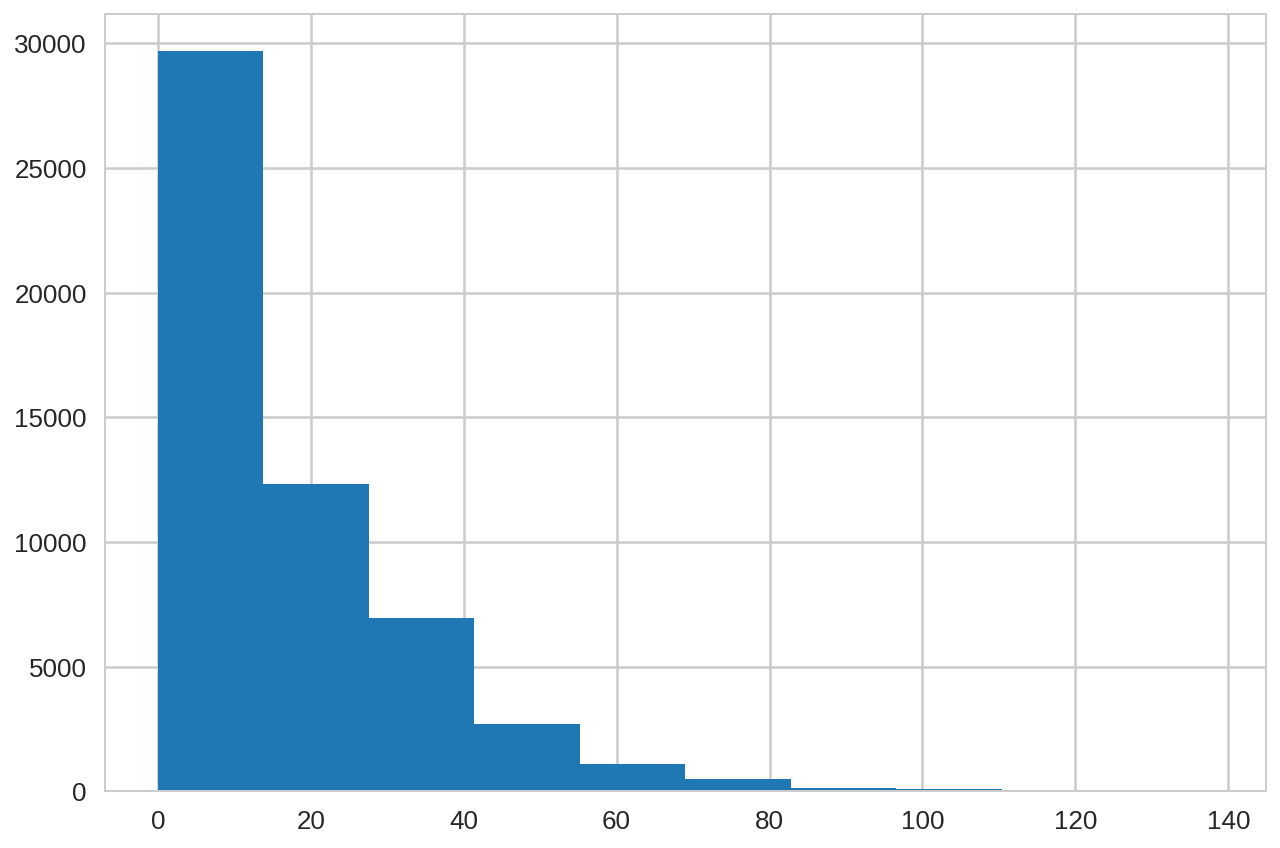

In [16]:
inspections["SCORE"].hist()

By default, the histogram has ~10 bars in out plot. We can change the resolution of the histogram using the `bins` variable. Larger number of `bins` allow for higher resolution, but if we increase the number too much, many bins end up having very few, or no data points. For example, experiment with changing the balue of bins below, and change the value from 50 to something bigger.

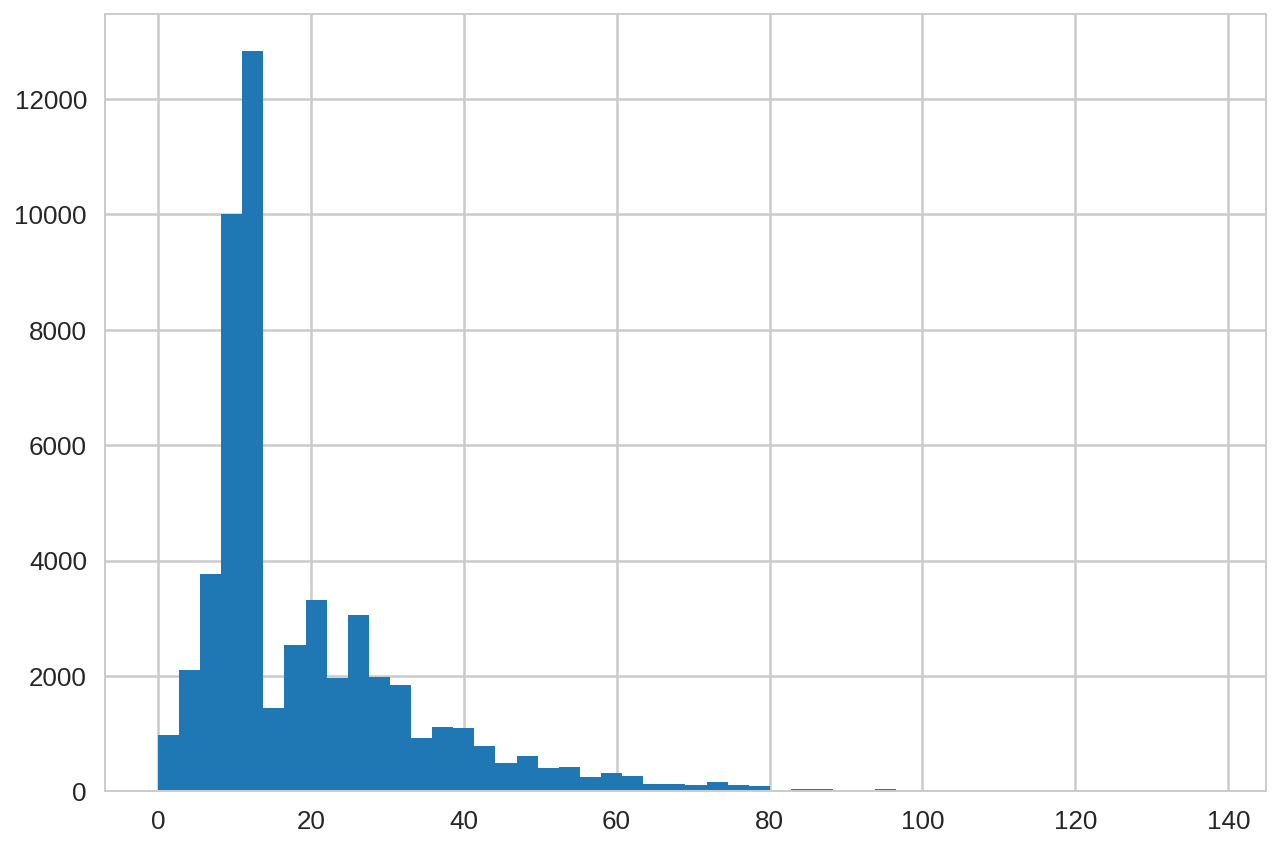

In [17]:
inspections["SCORE"].hist(bins=50)

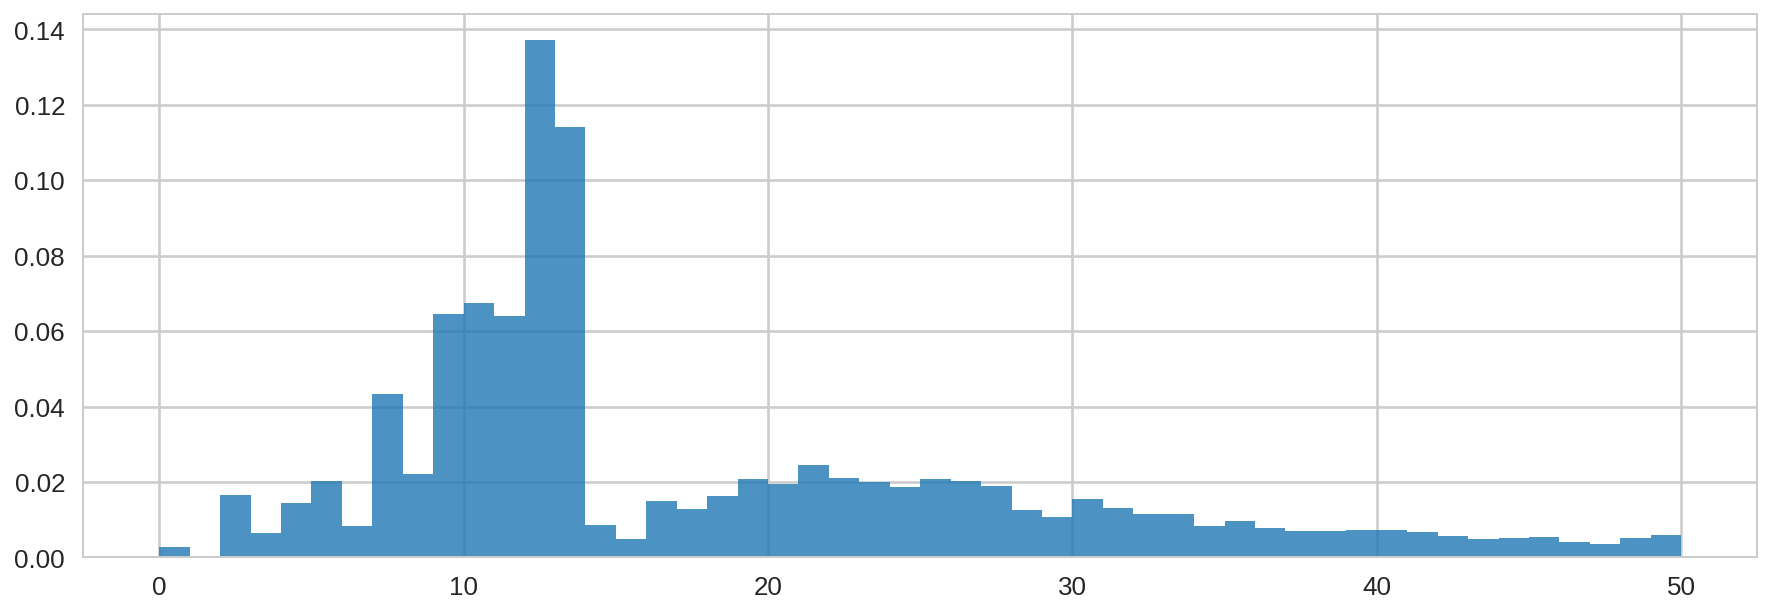

In [18]:
# A quick exposure to various options of the "hist" command
inspections["SCORE"].hist(
    bins=50,  # use 50 bars
    range=(0, 50),  # x-axis from 0 to 50
    density=True,  # show normalized count (density=True), or raw counts (density= False)
    figsize=(15, 5),  # controls the size of the plot
    alpha=0.8,  # make the plot 20% transparent
)

#### Kernel Density Estimation (KDE)

An alternative to histograms is to use the **kernel density**, which estimates a continuous function, instead of the bucketized counts, which tends to be discontunuous and bumpy. We can access this usind the `.plot(kind='kde')` command:

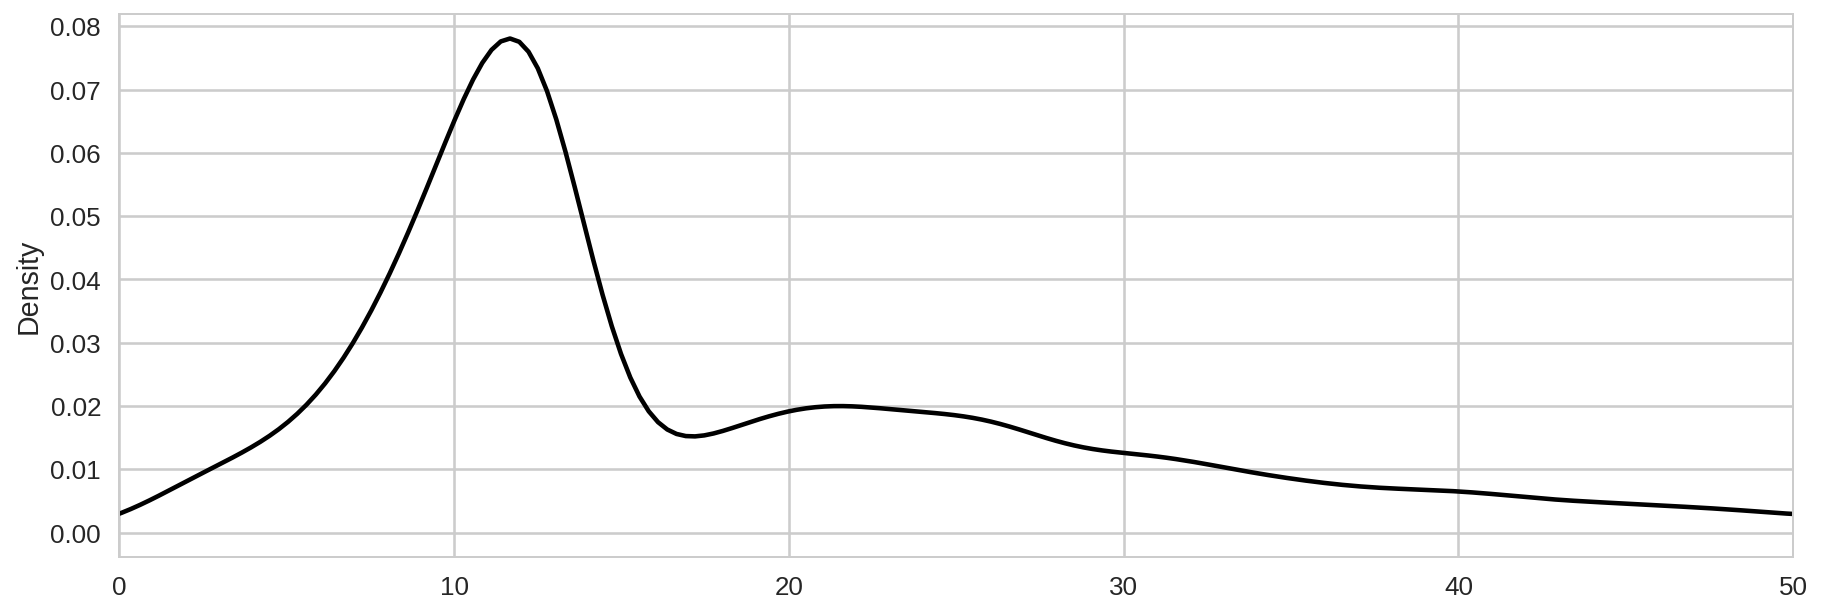

In [19]:
# This plots the density of a numeric attribute
# kde = kernel density estimation
inspections["SCORE"].plot(kind="kde", color="Black", xlim=(0, 50), figsize=(15, 5))

#### Extra: Combining plots

Just as a quick note, we can actually easily combine plots in Pandas, by saving a plot in a variable, and then passing the parameter `ax = ....` in the new figure that we are creating. That `ax` parameter indicates that we want to plot the new chart on top of the plot specified in the `ax` parameter.

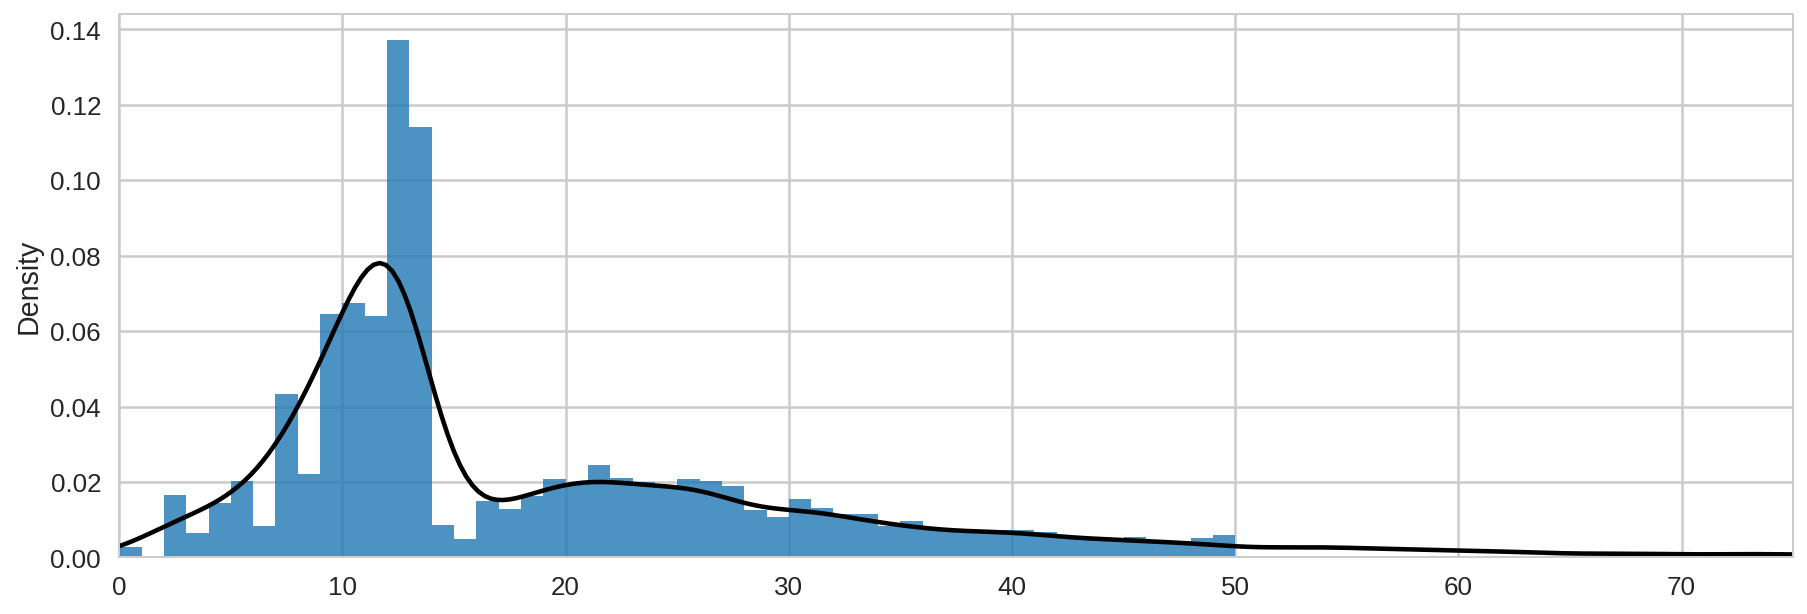

In [20]:
# We save the plot in the variable "histogram_figure"
histogram_figure = inspections["SCORE"].hist(
    bins=50,  # use 50 bars
    range=(0, 50),  # x-axis from 0 to 50
    density=True,  # show normalized count (density=True), or raw counts (density= False)
    figsize=(15, 5),  # controls the size of the plot
    alpha=0.8,  # make the plot 20% transparent
)

# To combine the plots, we pass the ax = histogram_figure parameter
inspections["SCORE"].plot(
    kind="kde", color="Black", xlim=(0, 75), figsize=(15, 5), ax=histogram_figure
)

#### Extra 2: Plotting Geographical Position

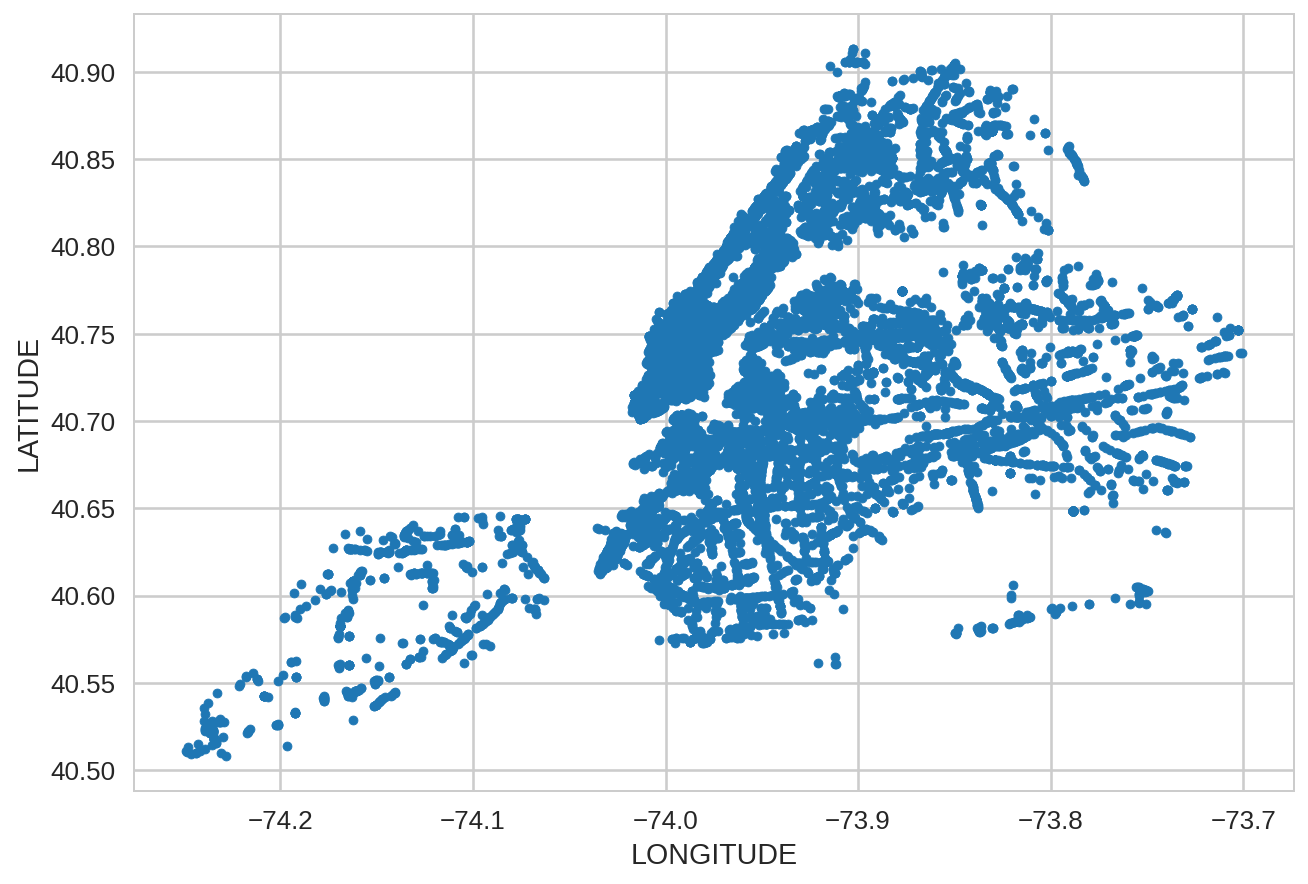

In [96]:
restaurants.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    # s = 0.25, # keep the size of each dot small
    # figsize = (10,10), # resise the figure
    # alpha = 0.5 # make dots transparent
)



In [ ]:
!sudo apt-get install -y -qq  libgeos-dev libproj-dev proj-data proj-bin libgdal-dev libspatialindex-dev 
!sudo pip install -q -U shapely rtree pygeos
!sudo pip install -q geopandas descartes

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


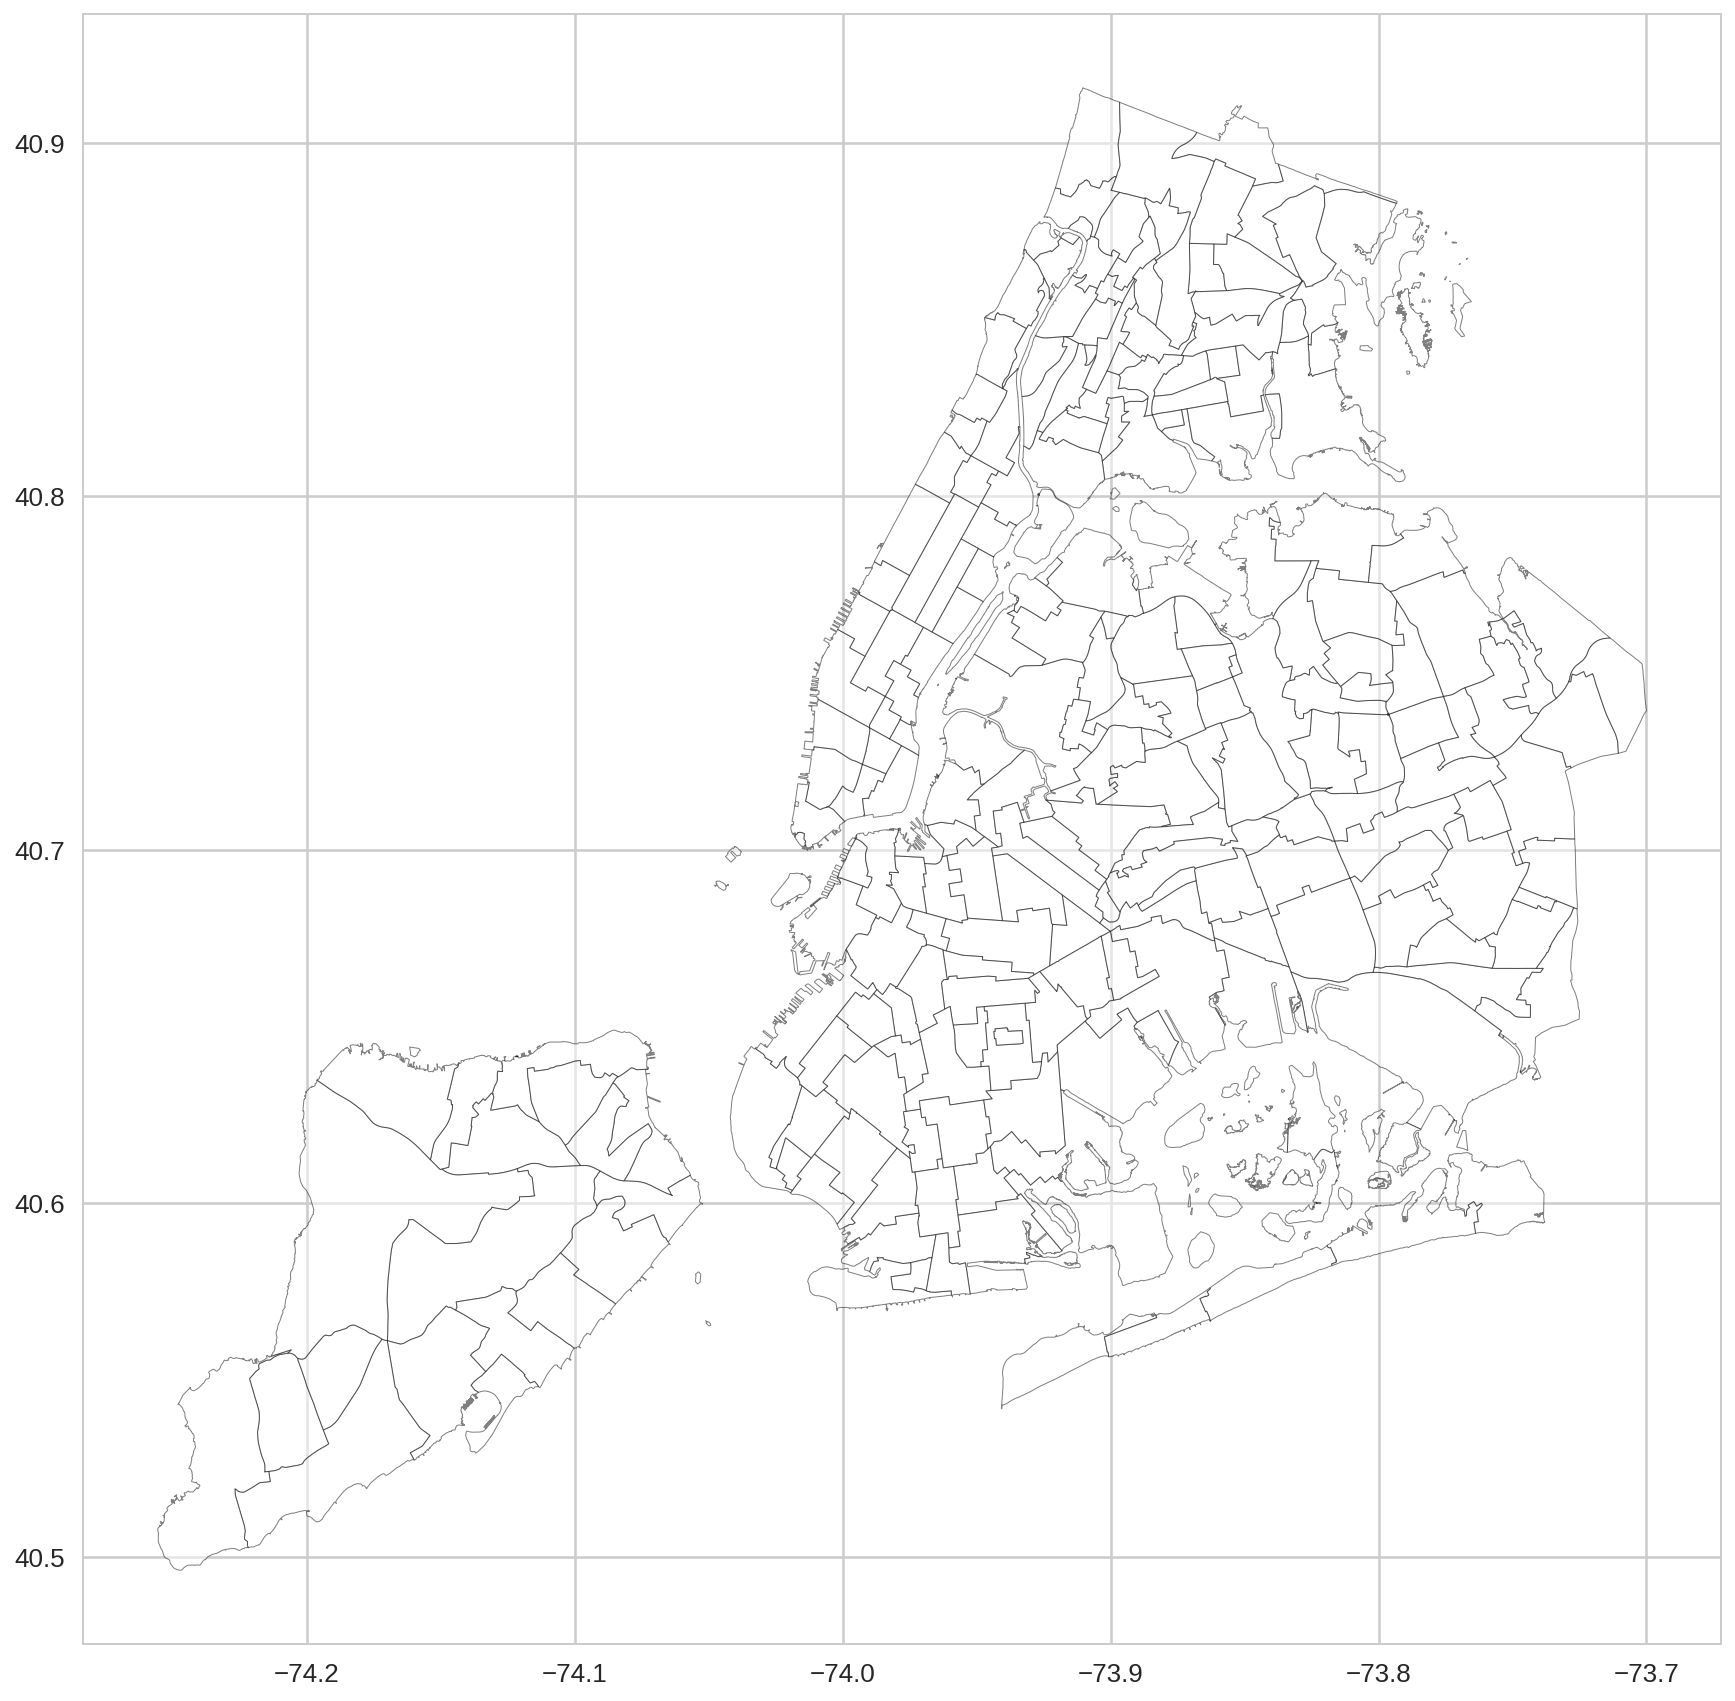

In [98]:
import geopandas as gpd

# Dataset from NYC Open Data: https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq
df_nyc = gpd.GeoDataFrame.from_file('https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile')

df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(20, 15),
    alpha=0.5)

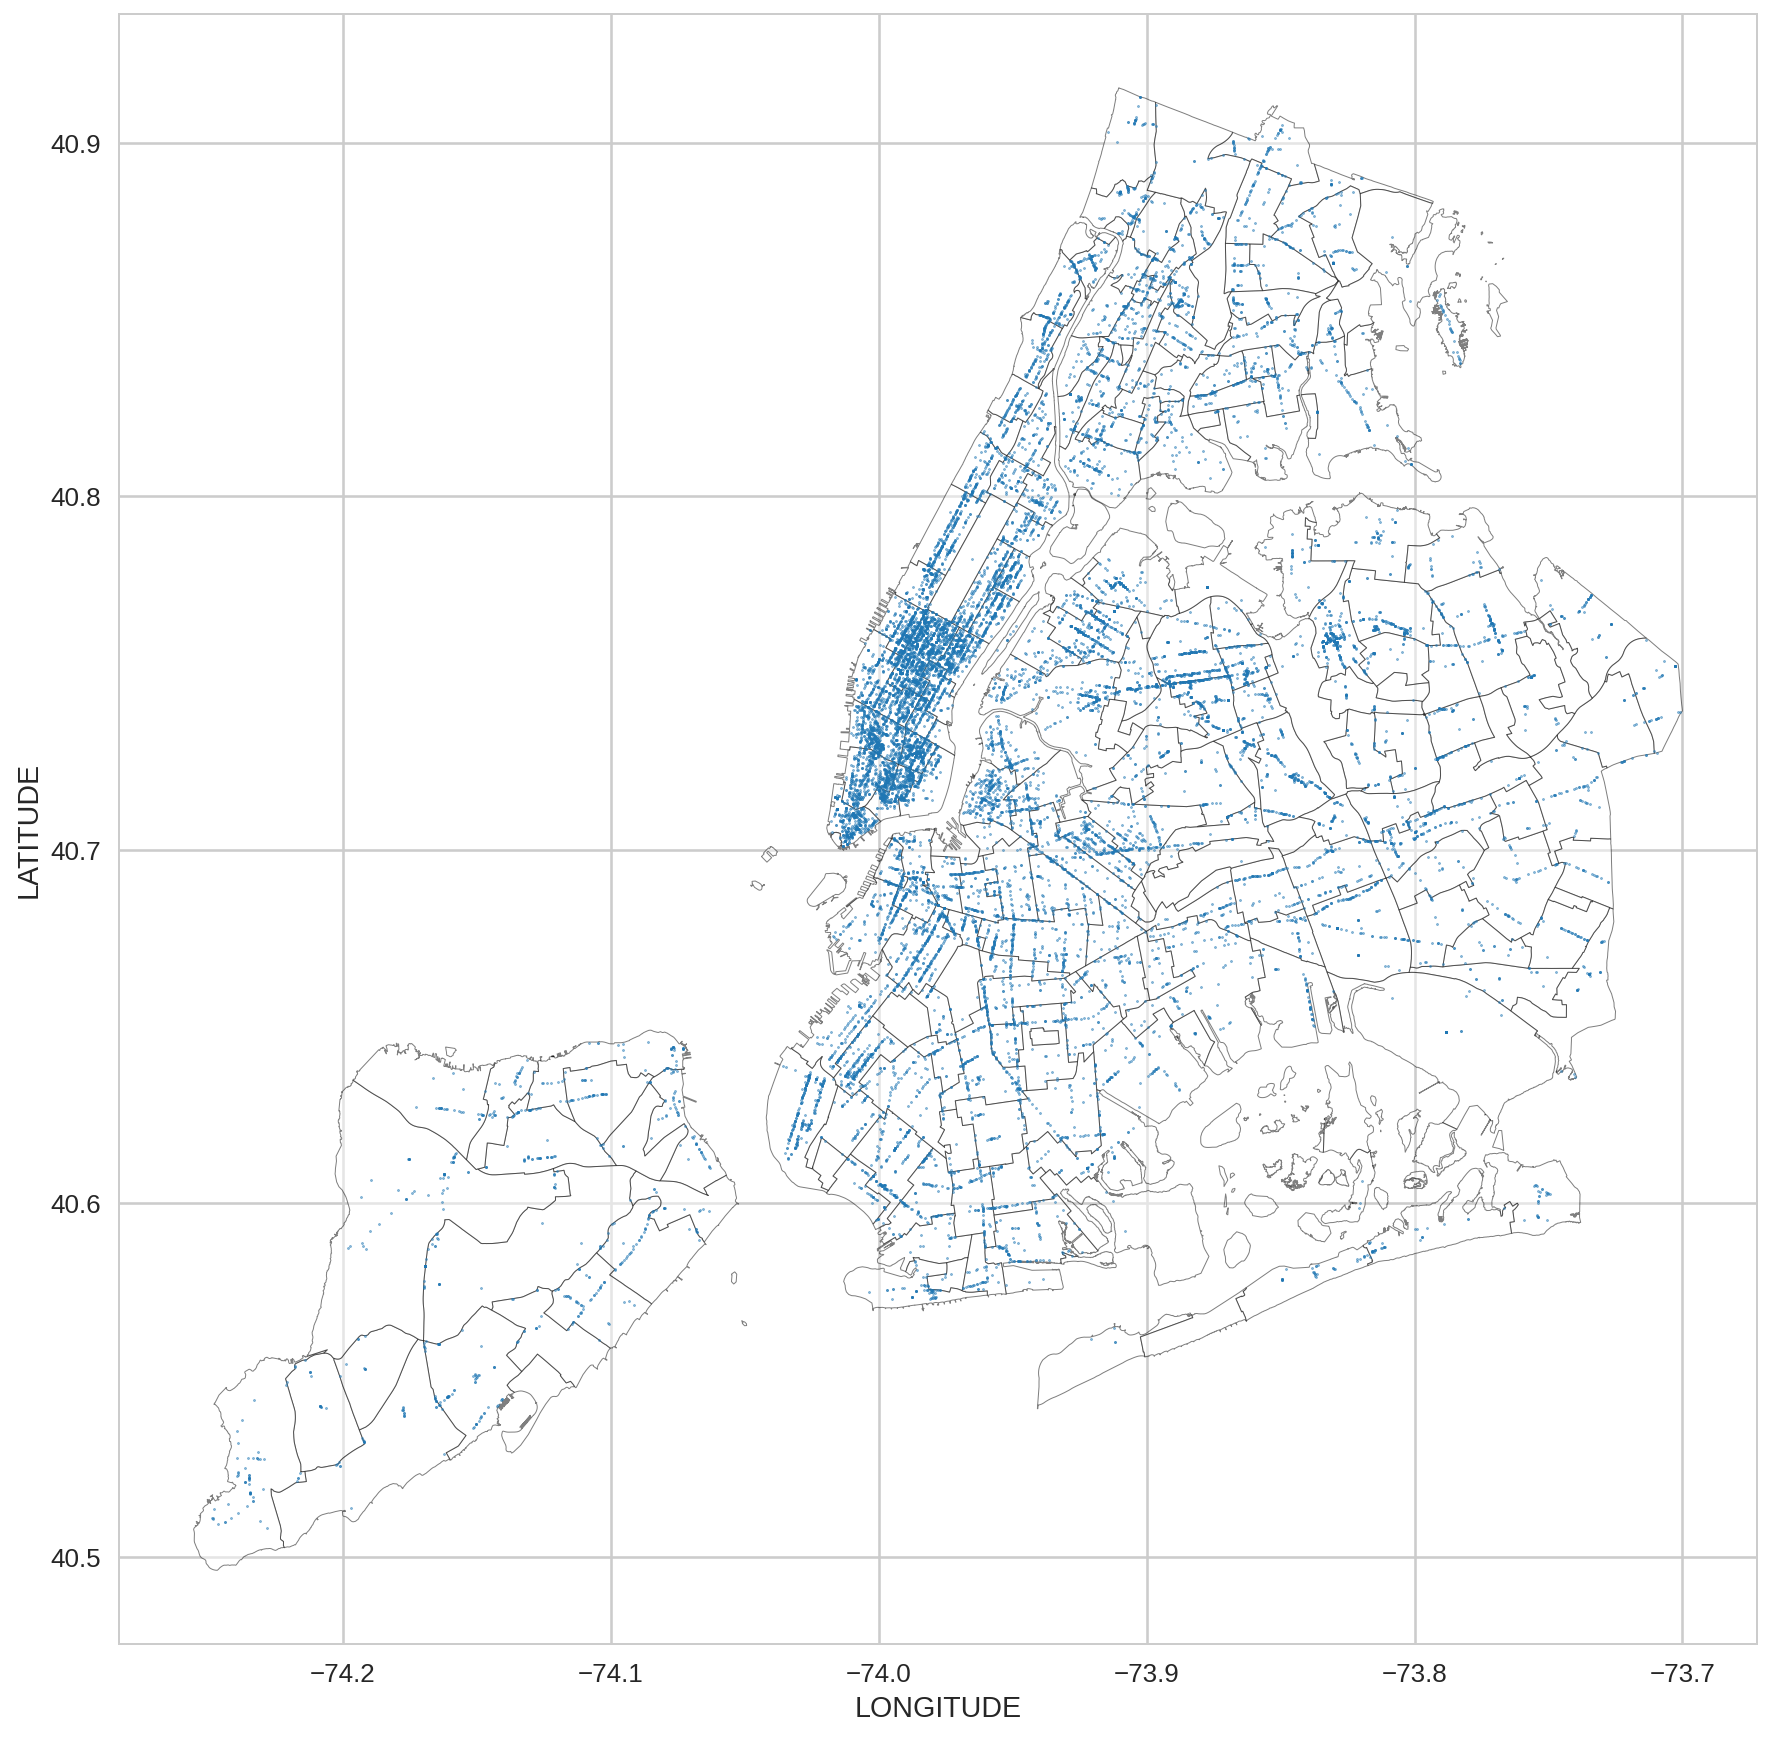

In [103]:
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(20, 15),
    alpha=0.5)

restaurants.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # keep the size of each dot small
    # figsize = (10,10), # resise the figure
    alpha = 0.5, # make dots transparent
    ax = base
)



### Descriptive Statistics for Dates


In [21]:
inspections["INSPECTION_DATE"].describe(datetime_is_numeric=True)

count                            53550
mean     2021-04-14 17:53:36.806722560
min                2015-10-03 00:00:00
25%                2020-02-06 00:00:00
50%                2022-01-04 00:00:00
75%                2022-03-22 00:00:00
max                2022-05-20 00:00:00
Name: INSPECTION_DATE, dtype: object

#### Exercise

* Plot a histogram for `INSPECTION_DATE`. What do you see?
* Try modifying the `bins` parameter. What are the results?
* The `range=(start, finish)` command is often useful, when we want to focus on a particular part of the dataset. Try using that for  `INSPECTION DATE` to limit the dates to be between 1/1/2019 and 05/30/2022.

In [22]:
# your code here

#### Solution

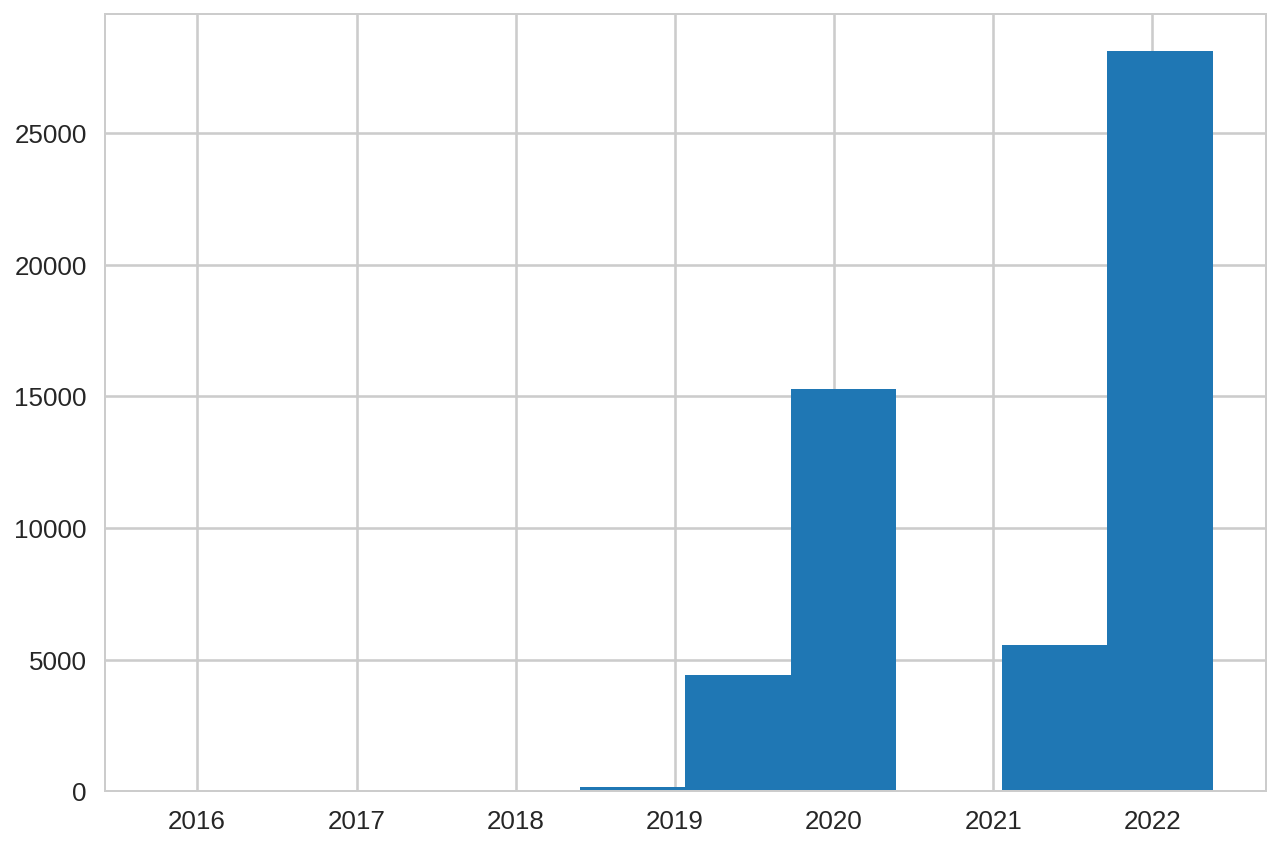

In [23]:
# Not very appealing
inspections["INSPECTION_DATE"].hist()

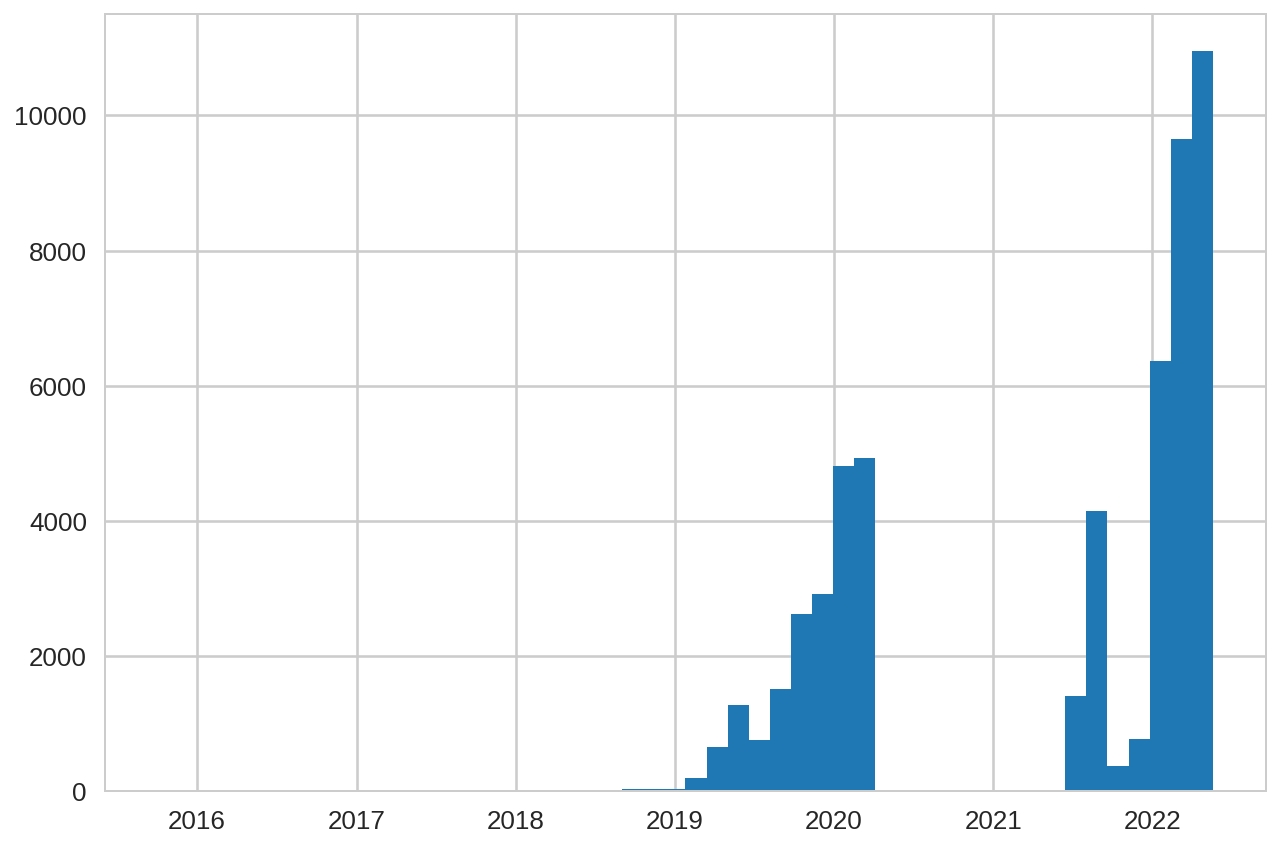

In [24]:
inspections["INSPECTION_DATE"].hist(bins=50)

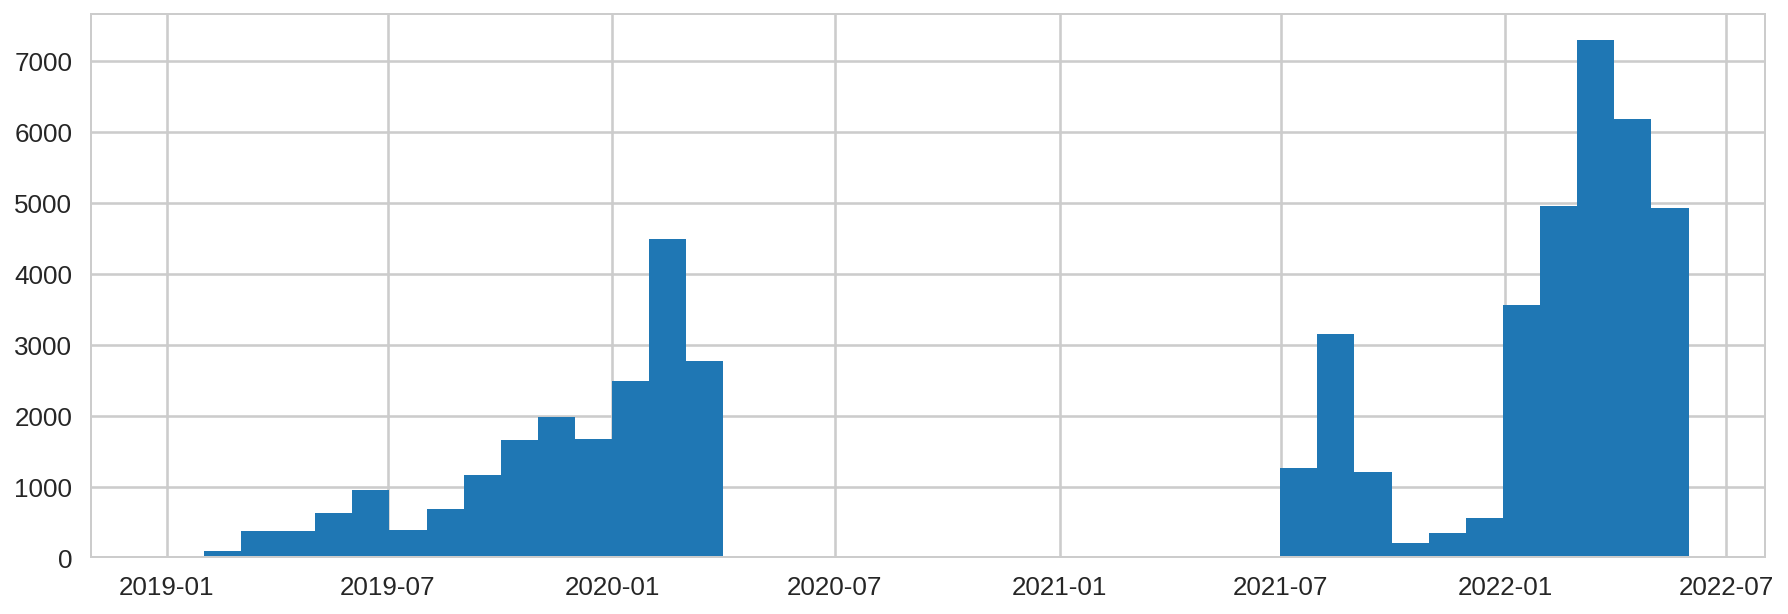

In [25]:
x_start = pd.to_datetime("2019-01-01")
x_end = pd.to_datetime("2022-05-31")
bins = (x_end - x_start) / np.timedelta64(1, "M")  # one bin per month

inspections["INSPECTION_DATE"].hist(
    range=(
        x_start,
        x_end,
    ),  # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins=round(bins),  # number of months in the range -- computed manually
    figsize=(15, 5),  # resize 15-width, 5-height
)

### Descriptive Statistics for Categorical/string columns

We can also get quick statistics about the common values that appear in each column:

In [26]:
restaurants["DBA"].value_counts()

DUNKIN                                           387
STARBUCKS                                        210
SUBWAY                                           190
MCDONALD'S                                       165
POPEYES                                           81
                                                ... 
STK Steakhouse Midtown                             1
DL                                                 1
PERA SOHO                                          1
Y & Y BAKERY                                       1
COURTYARD BY MARRIOTT NEW YORK MANHATTAN/SOHO      1
Name: DBA, Length: 15280, dtype: int64

In [27]:
restaurants["CUISINE_DESCRIPTION"].value_counts()

American             3982
Chinese              1660
Coffee/Tea           1252
Pizza                1201
Italian               803
                     ... 
Fruits/Vegetables       1
Fusion                  1
Chilean                 1
Iranian                 1
Basque                  1
Name: CUISINE_DESCRIPTION, Length: 85, dtype: int64

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

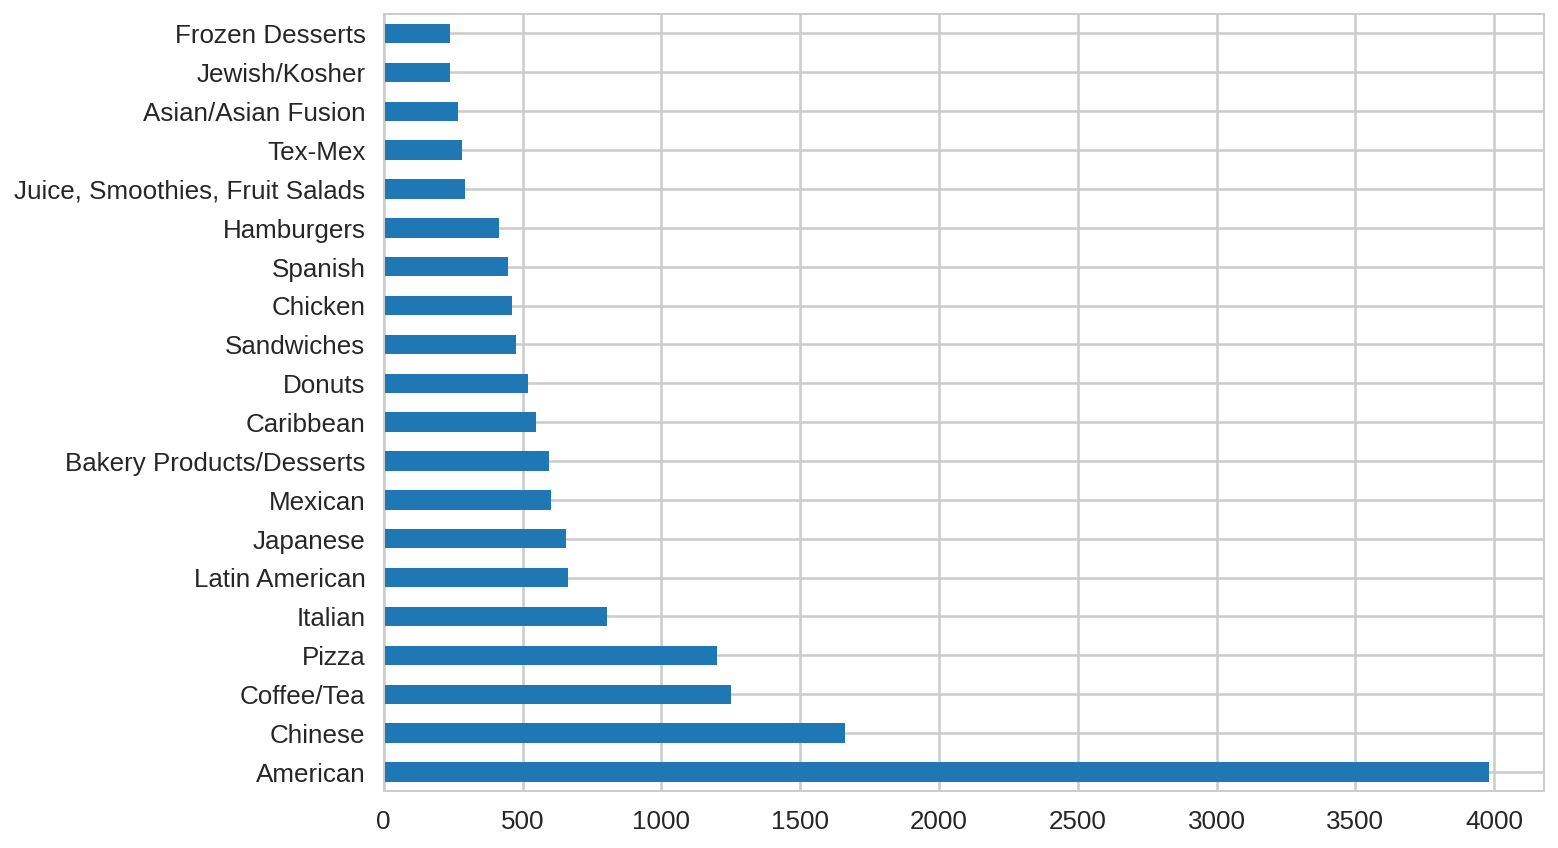

In [28]:
restaurants["CUISINE_DESCRIPTION"].value_counts()[:20].plot(kind="barh")

In [29]:
popular = restaurants["CUISINE_DESCRIPTION"].value_counts()
popular

American             3982
Chinese              1660
Coffee/Tea           1252
Pizza                1201
Italian               803
                     ... 
Fruits/Vegetables       1
Fusion                  1
Chilean                 1
Iranian                 1
Basque                  1
Name: CUISINE_DESCRIPTION, Length: 85, dtype: int64

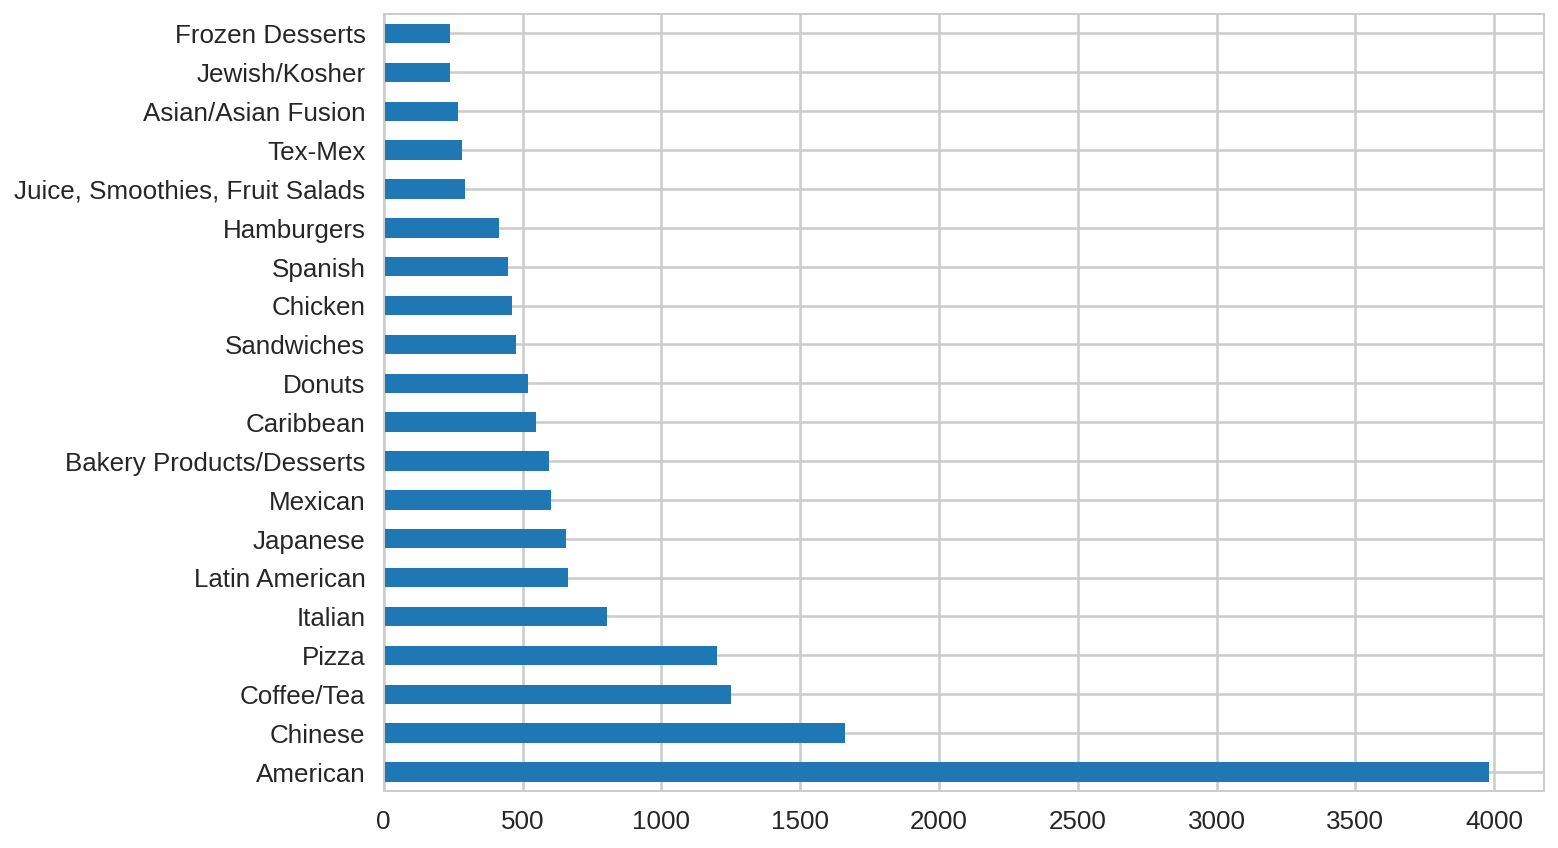

In [30]:
popular[:20].plot(kind="barh")

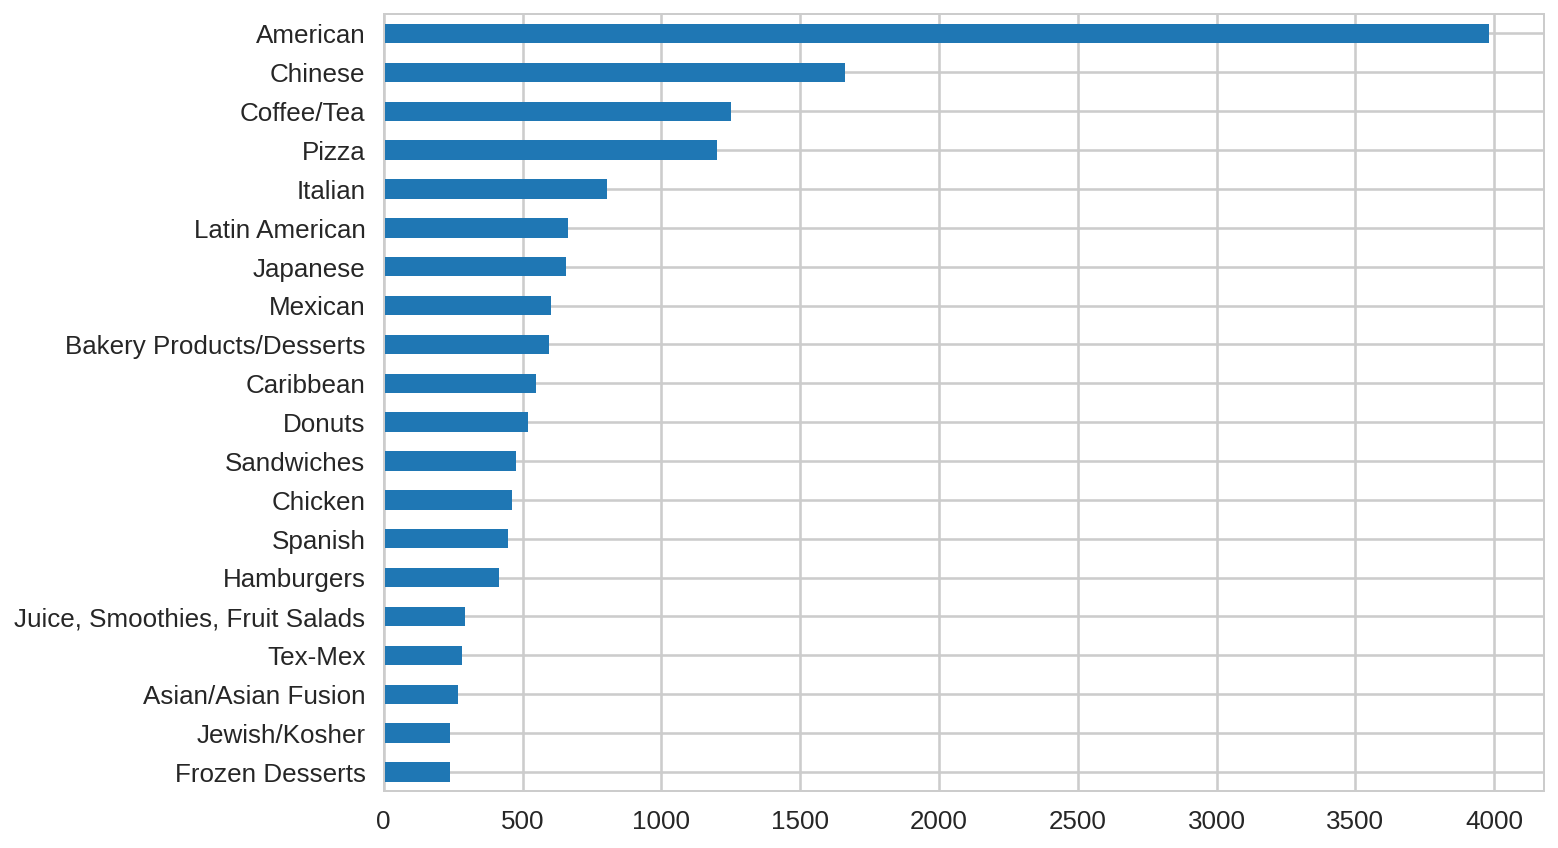

In [31]:
# We can invert the list by starting at element 19 (the 20th element)
# and then go to the beginning of the list going backwards (the :-1 at the end)
popular[19::-1].plot(kind="barh")

#### Exercise

Using the "inspections" dataframe, analyze the `VIOLATION_CODE` attribute and identify the most common violation codes in the data. Create a bar plot as above to show the frequency of the various violations codes.

If you are adventurous, issue a query against the database using the `read_sql` command and get the descriptions of the violations from the table `doh_restaurants.violaction_codes`

In [32]:
# your code here

#### Exercise

* Create a plot showing the number of restaurants across **boroughs**. Use the `BORO` column and the `value_counts()` function.

In [33]:
# your code here

#### Solution 

In [34]:
restaurants["BORO"].value_counts()

Manhattan        7385
Brooklyn         4722
Queens           4286
Bronx            1836
Staten Island     676
Name: BORO, dtype: int64

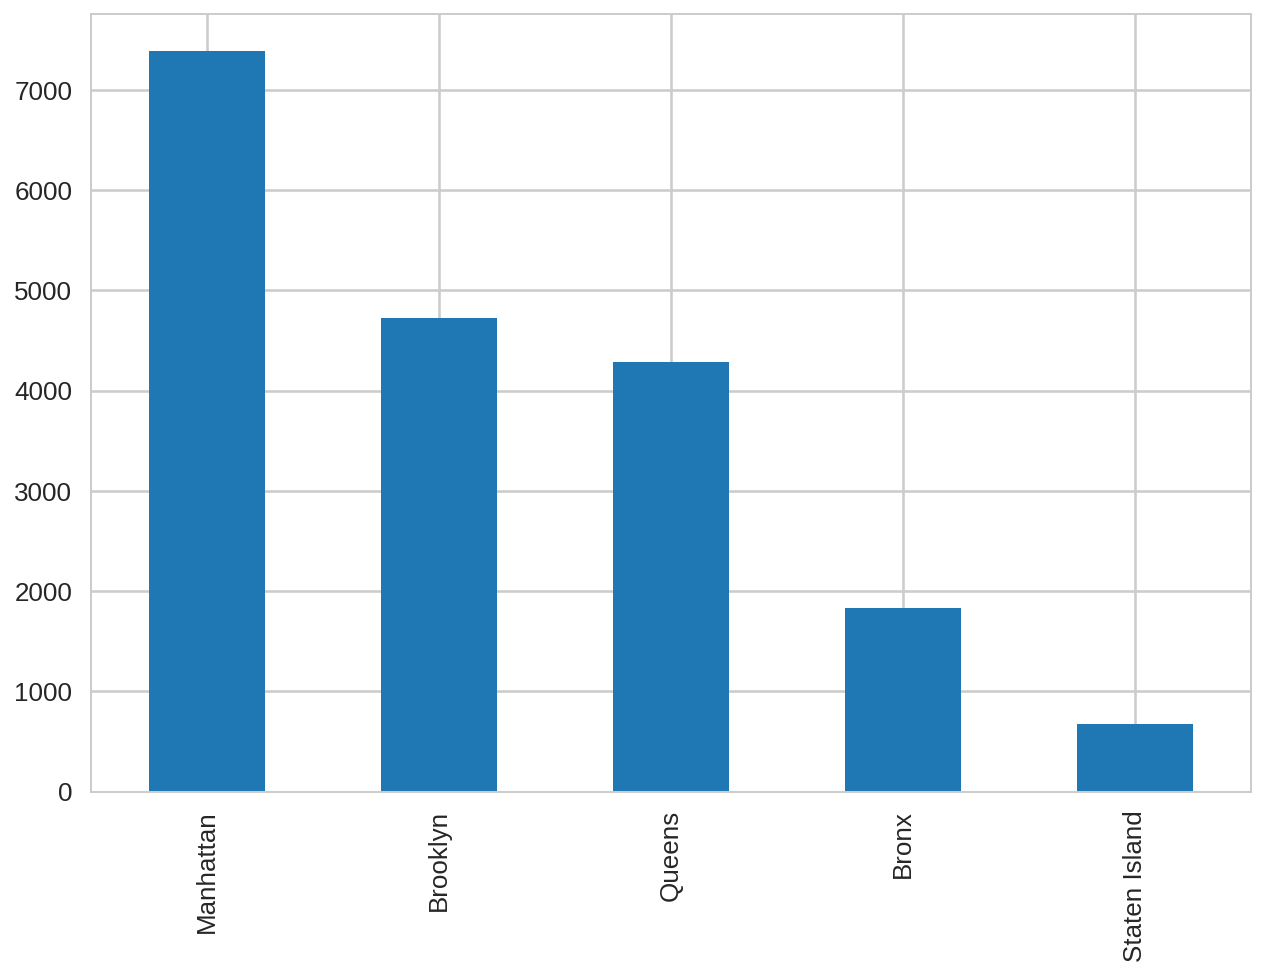

In [35]:
restaurants["BORO"].value_counts().plot(kind="bar")

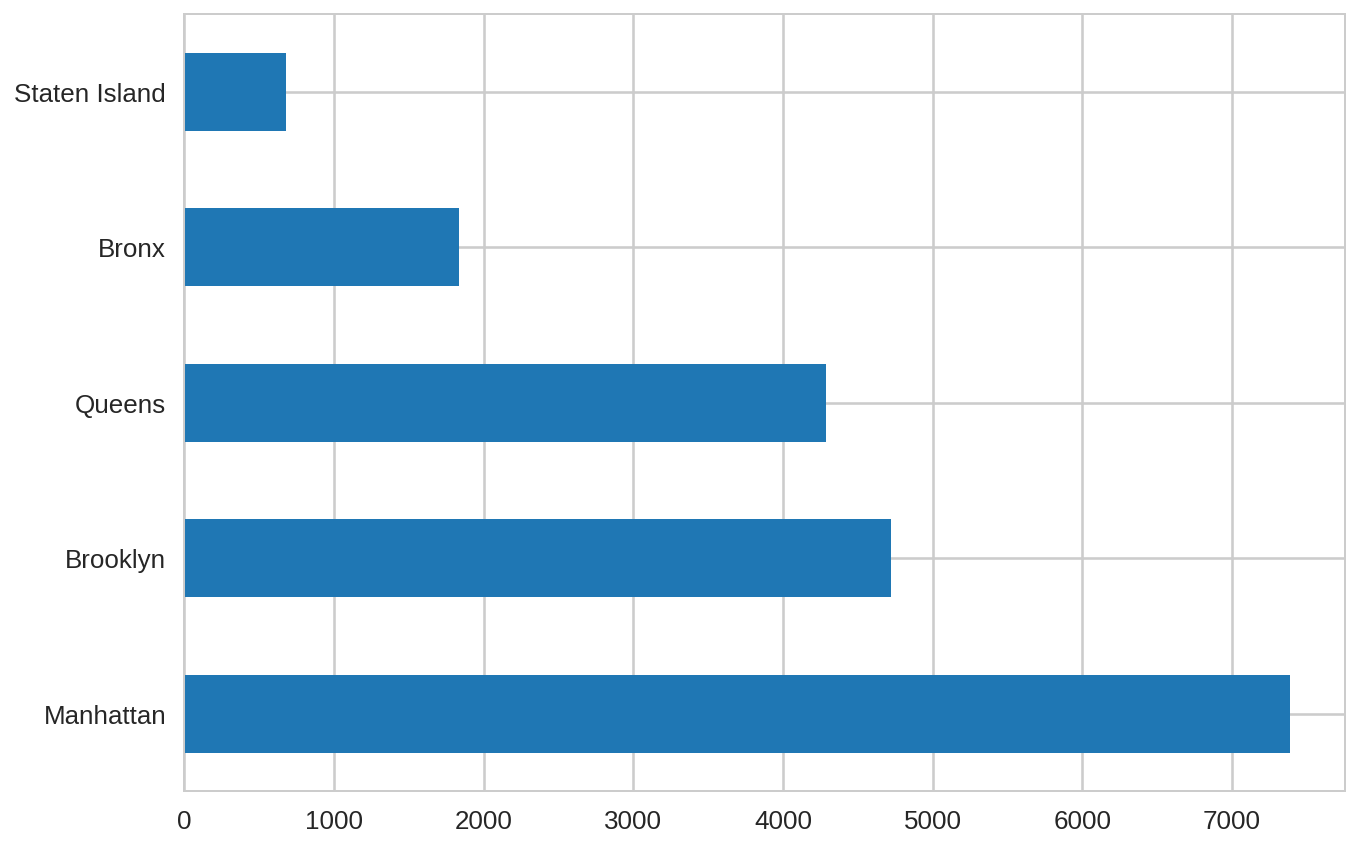

In [36]:
restaurants["BORO"].value_counts().plot(kind="barh")

# Basic Data Manipulation Techniques

## Selecting a subset of the columns -- `filter()`

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [37]:
inspections

,CAMIS,DBA,ZIPCODE,BORO,INSPECTION_DATE,INSPECTION_ID,INSPECTION_TYPE,VIOLATION_CODE,SCORE,GRADE
0,30075445,MORRIS PARK BAKE SHOP,10462,Bronx,2021-08-10,56198,Initial Inspection,06E,5,A
1,30112340,WENDY'S,11225,Brooklyn,2021-08-05,55913,Re-inspection,08A,16,B
2,30112340,WENDY'S,11225,Brooklyn,2021-08-05,55913,Re-inspection,02G,16,B
3,30112340,WENDY'S,11225,Brooklyn,2021-08-05,55913,Re-inspection,04N,16,B
4,30191841,DJ REYNOLDS PUB AND RESTAURANT,10019,Manhattan,2022-01-04,59053,Initial Inspection,10B,12,A
...,...,...,...,...,...,...,...,...,...,...
53545,50117959,SOL MAYA RESTAURANT,10029,Manhattan,2022-03-16,63547,Initial Inspection,06C,8,A
53546,50117959,SOL MAYA RESTAURANT,10029,Manhattan,2022-03-16,63547,Initial Inspection,10F,8,A
53547,50119170,COURTYARD BY MARRIOTT NEW YORK MANHATTAN/SOHO,10014,Manhattan,2022-04-21,66208,Initial Inspection,10F,13,A
53548,50119170,COURTYARD BY MARRIOTT NEW YORK MANHATTAN/SOHO,10014,Manhattan,2022-04-21,66208,Initial Inspection,02G,13,A


In [38]:
inspections.filter( 
    items = ["DBA", "GRADE", "INSPECTION_DATE"] 
)

,DBA,GRADE,INSPECTION_DATE
0,MORRIS PARK BAKE SHOP,A,2021-08-10
1,WENDY'S,B,2021-08-05
2,WENDY'S,B,2021-08-05
3,WENDY'S,B,2021-08-05
4,DJ REYNOLDS PUB AND RESTAURANT,A,2022-01-04
...,...,...,...
53545,SOL MAYA RESTAURANT,A,2022-03-16
53546,SOL MAYA RESTAURANT,A,2022-03-16
53547,COURTYARD BY MARRIOTT NEW YORK MANHATTAN/SOHO,A,2022-04-21
53548,COURTYARD BY MARRIOTT NEW YORK MANHATTAN/SOHO,A,2022-04-21


In [39]:
columns = ["CAMIS", "DBA", "GRADE", "INSPECTION_DATE", "SCORE"] 

# Notice the use of "chain notation" below
# Chain notation means putting parentheses around
# the command and then having each operation in its
# own line
(
  inspections
  .filter( items = columns )
  .head(10)
)


,CAMIS,DBA,GRADE,INSPECTION_DATE,SCORE
0,30075445,MORRIS PARK BAKE SHOP,A,2021-08-10,5
1,30112340,WENDY'S,B,2021-08-05,16
2,30112340,WENDY'S,B,2021-08-05,16
3,30112340,WENDY'S,B,2021-08-05,16
4,30191841,DJ REYNOLDS PUB AND RESTAURANT,A,2022-01-04,12
5,30191841,DJ REYNOLDS PUB AND RESTAURANT,A,2022-01-04,12
6,30191841,DJ REYNOLDS PUB AND RESTAURANT,A,2022-01-04,12
7,40356018,RIVIERA CATERERS,A,2022-02-01,7
8,40356483,WILKEN'S FINE FOOD,A,2022-01-24,9
9,40356483,WILKEN'S FINE FOOD,A,2022-01-24,9


We can also use the `like` option to find all the column names that include a certain string. For example, to get all the columns that include the string `DATE`:

In [40]:
inspections.filter(
    like = 'DATE'
)

,INSPECTION_DATE
0,2021-08-10
1,2021-08-05
2,2021-08-05
3,2021-08-05
4,2022-01-04
...,...
53545,2022-03-16
53546,2022-03-16
53547,2022-04-21
53548,2022-04-21


We can expand the functionality and also use regular expressions:

In [41]:
restaurants.filter(
    regex = r'^C' # all the columns that start with C
)

,CAMIS,CUISINE_DESCRIPTION
0,30075445,Bakery Products/Desserts
1,30112340,Hamburgers
2,30191841,Irish
3,40356018,American
4,40356483,Sandwiches
...,...,...
18900,50117158,Chinese
18901,50117251,Chicken
18902,50117350,Coffee/Tea
18903,50117959,American


### Exercise

Keep the columns "DBA", "SCORE", "CUISINE DESCRIPTION" and "ZIPCODE".

In [42]:
# your code here

## Renaming Columns -- `rename()`

To do the equivalent of `SELECT attr AS alias` in Pandas, we use the `rename` command, and pass a dictionary specifying which columns we want to rename:



In [43]:
restaurants.rename(
    columns = {
      "CAMIS": "RESTID",
      "DBA": "REST_NAME",
      "BUILDING": "STREET_NUM",
      "BORO": "BOROUGH"
    }
)

,RESTID,REST_NAME,STREET_NUM,STREET,ZIPCODE,BOROUGH,CUISINE_DESCRIPTION,LATITUDE,LONGITUDE
0,30075445,MORRIS PARK BAKE SHOP,1007,MORRIS PARK AVENUE,10462,Bronx,Bakery Products/Desserts,40.8482,-73.8560
1,30112340,WENDY'S,469,FLATBUSH AVENUE,11225,Brooklyn,Hamburgers,40.6627,-73.9621
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,351,WEST 57 STREET,10019,Manhattan,Irish,40.7673,-73.9843
3,40356018,RIVIERA CATERERS,2780,STILLWELL AVENUE,11224,Brooklyn,American,40.5799,-73.9821
4,40356483,WILKEN'S FINE FOOD,7114,AVENUE U,11234,Brooklyn,Sandwiches,40.6201,-73.9070
...,...,...,...,...,...,...,...,...,...
18900,50117158,CHINA CITY RESTAURANT,308,EAST 188 STREET,10458,Bronx,Chinese,40.8607,-73.8951
18901,50117251,DAN AND JOHN'S WINGS,445,ALBEE SQUARE,11201,Brooklyn,Chicken,40.6908,-73.9835
18902,50117350,SONG TEA,488,7 AVENUE,10018,Manhattan,Coffee/Tea,40.7525,-73.9895
18903,50117959,SOL MAYA RESTAURANT,2061,2 AVENUE,10029,Manhattan,American,40.7905,-73.9425


## Selecting rows -- `query()`

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [44]:
# Find all violations for restaurants with DBA being Starbucks
restaurants.query(' DBA == "STARBUCKS" ')

,CAMIS,DBA,BUILDING,STREET,ZIPCODE,BORO,CUISINE_DESCRIPTION,LATITUDE,LONGITUDE
623,40399099,STARBUCKS,1445,1 AVENUE,10021,Manhattan,Coffee/Tea,40.7698,-73.9545
644,40399787,STARBUCKS,1128,3 AVENUE,10065,Manhattan,Coffee/Tea,40.7658,-73.9635
659,40400204,STARBUCKS,585,2 AVENUE,10016,Manhattan,Coffee/Tea,40.7436,-73.9767
664,40400483,STARBUCKS,2252,BROADWAY,10024,Manhattan,Coffee/Tea,40.7849,-73.9792
858,40515702,STARBUCKS,78,SPRING STREET,10012,Manhattan,Coffee/Tea,40.7226,-73.9979
...,...,...,...,...,...,...,...,...,...
18013,50091822,STARBUCKS,332,WEST 34 STREET,10001,Manhattan,Coffee/Tea,40.7526,-73.9945
18203,50093959,STARBUCKS,45,WEST 4 STREET,10012,Manhattan,Coffee/Tea,40.7294,-73.9963
18279,50094891,STARBUCKS,388,GREENWICH STREET,10013,Manhattan,Coffee/Tea,40.7207,-74.0101
18520,50099536,STARBUCKS,277,PARK AVENUE,10172,Manhattan,Coffee/Tea,40.7556,-73.9751


In [45]:
# Find all violations with code 04L (i.e., "has mice")
inspections.query(' VIOLATION_CODE == "04L" ')

,CAMIS,DBA,ZIPCODE,BORO,INSPECTION_DATE,INSPECTION_ID,INSPECTION_TYPE,VIOLATION_CODE,SCORE,GRADE
8,40356483,WILKEN'S FINE FOOD,11234,Brooklyn,2022-01-24,59983,Re-inspection,04L,9,A
28,40362264,P & S DELI GROCERY,10025,Manhattan,2022-02-08,61128,Initial Inspection,04L,17,None
43,40363630,LORENZO & MARIA'S KITCHEN,10028,Manhattan,2019-12-03,45638,Initial Inspection,04L,9,A
53,40364179,SPOONBREAD TOO,10025,Manhattan,2020-01-27,49937,Initial Inspection,04L,28,None
81,40364439,SEVILLA RESTAURANT,10014,Manhattan,2021-08-04,55775,Initial Inspection,04L,27,None
...,...,...,...,...,...,...,...,...,...,...
53437,50111246,DOMY PIZZA,10455,Bronx,2022-01-20,59912,Initial Inspection,04L,9,A
53458,50111445,THANKS GIVING CHINESE FOOD,11226,Brooklyn,2022-05-04,66912,Initial Inspection,04L,24,None
53473,50111498,CROWN ONE,11354,Queens,2022-01-26,60335,Re-inspection,04L,38,C
53501,50112918,SOFRITO AL PUNTO RESTAURANT,11204,Brooklyn,2022-04-26,66463,Initial Inspection,04L,45,None


In [46]:
# We can store the result in a dataframe called  has_mice
has_mice = inspections.query(' VIOLATION_CODE == "04L" ')
has_mice

,CAMIS,DBA,ZIPCODE,BORO,INSPECTION_DATE,INSPECTION_ID,INSPECTION_TYPE,VIOLATION_CODE,SCORE,GRADE
8,40356483,WILKEN'S FINE FOOD,11234,Brooklyn,2022-01-24,59983,Re-inspection,04L,9,A
28,40362264,P & S DELI GROCERY,10025,Manhattan,2022-02-08,61128,Initial Inspection,04L,17,None
43,40363630,LORENZO & MARIA'S KITCHEN,10028,Manhattan,2019-12-03,45638,Initial Inspection,04L,9,A
53,40364179,SPOONBREAD TOO,10025,Manhattan,2020-01-27,49937,Initial Inspection,04L,28,None
81,40364439,SEVILLA RESTAURANT,10014,Manhattan,2021-08-04,55775,Initial Inspection,04L,27,None
...,...,...,...,...,...,...,...,...,...,...
53437,50111246,DOMY PIZZA,10455,Bronx,2022-01-20,59912,Initial Inspection,04L,9,A
53458,50111445,THANKS GIVING CHINESE FOOD,11226,Brooklyn,2022-05-04,66912,Initial Inspection,04L,24,None
53473,50111498,CROWN ONE,11354,Queens,2022-01-26,60335,Re-inspection,04L,38,C
53501,50112918,SOFRITO AL PUNTO RESTAURANT,11204,Brooklyn,2022-04-26,66463,Initial Inspection,04L,45,None


In [47]:
# List the most frequent DBA values in the has_mice dataframe
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   40
DUNKIN                                   39
KENNEDY FRIED CHICKEN                    14
DOMINO'S                                 14
GOLDEN KRUST CARIBBEAN BAKERY & GRILL    13
CROWN FRIED CHICKEN                      13
STARBUCKS                                11
PAPA JOHN'S                              11
MCDONALD'S                                9
BURGER KING                               8
POPEYES                                   8
IHOP                                      7
CARVEL                                    7
DUNKIN',' BASKIN ROBBINS                  7
BLUESTONE LANE                            6
16 HANDLES                                5
INSOMNIA COOKIES                          5
CHIPOTLE MEXICAN GRILL                    5
DUNKIN', 'BASKIN ROBBINS                  4
AMC THEATRES                              4
Name: DBA, dtype: int64

In [48]:
# For comparison, the most frequent DBA names overall across restaurants
restaurants["DBA"].value_counts()[:20]

DUNKIN                                   387
STARBUCKS                                210
SUBWAY                                   190
MCDONALD'S                               165
POPEYES                                   81
CHIPOTLE MEXICAN GRILL                    64
BURGER KING                               62
DOMINO'S                                  60
DUNKIN',' BASKIN ROBBINS                  58
KENNEDY FRIED CHICKEN                     56
CROWN FRIED CHICKEN                       47
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     41
PRET A MANGER                             39
CARVEL                                    34
WENDY'S                                   31
PAPA JOHN'S                               27
DUNKIN'                                   25
STARBUCKS COFFEE                          25
SHAKE SHACK                               22
SWEETGREEN                                22
Name: DBA, dtype: int64

And we can use more complex conditions. 

In [49]:
has_mice_10012 = (
    inspections
    .query('  VIOLATION_CODE == "04L" and ZIPCODE == "10012" ')
    .filter( items = ['DBA', 'INSPECTION_DATE'])
)

has_mice_10012

,DBA,INSPECTION_DATE
588,THE MALT HOUSE,2022-02-08
646,BLUE NOTE JAZZ,2020-01-28
733,MONTE'S,2022-03-01
1375,MARUMI,2019-10-16
1676,TOM AND JERRY BAR,2022-03-08
...,...,...
49949,POSH POP BAKESHOP,2022-05-12
51151,BOSIE,2020-03-06
51900,FIFTYLAN,2021-09-10
53264,COCO'S COFFEE HOUSE,2022-01-19


## Selecting distinct values -- `drop_duplicates()`

We can do the equivalent of `SELECT DISTINCT` in Pandas by doing the following

In [50]:
(
    restaurants
    .query(' CUISINE_DESCRIPTION == "Coffee/Tea"  and ZIPCODE == "10012" ')
    .filter( items = ['DBA'])
    .drop_duplicates()
)

,DBA
858,STARBUCKS
2372,FORTY CARROTS
3008,THINK COFFEE
3246,LITTLE ATLAS CAFE
4435,THIRD RAIL COFFEE
4454,MCNALLY JACKSON CAFE
4523,LA COLOMBE
6367,GASOLINE ALLEY COFFEE
8388,THE UNCOMMONS
11360,YOURS TRULY


## Sorting values -- `sort_values()`

And we can do the equivalent of `ORDER BY` by using the `.sort_values()

In [51]:
(
    has_mice_10012
    .sort_values("INSPECTION_DATE", ascending=False)
    .head(15)
)

,DBA,INSPECTION_DATE
29838,MOCHA BURGER,2022-05-17
49949,POSH POP BAKESHOP,2022-05-12
49941,BERLIN DONER,2022-05-12
12825,THE SMILE,2022-05-04
15928,MARCELLINO,2022-04-26
32626,RAPHA CYCLE CLUB,2022-04-26
19069,"CAFETAL SOCIAL CLUB, CHACHIS",2022-04-26
27207,AIRS CHAMPAGNE PARLOR,2022-04-20
27370,MANOUSHEH,2022-04-19
31216,BO CA PHE,2022-04-18


In [52]:
(
    has_mice_10012
    .sort_values(["INSPECTION_DATE","DBA"], ascending=[False,True])
    .head(15)
)

,DBA,INSPECTION_DATE
29838,MOCHA BURGER,2022-05-17
49941,BERLIN DONER,2022-05-12
49949,POSH POP BAKESHOP,2022-05-12
12825,THE SMILE,2022-05-04
19069,"CAFETAL SOCIAL CLUB, CHACHIS",2022-04-26
15928,MARCELLINO,2022-04-26
32626,RAPHA CYCLE CLUB,2022-04-26
27207,AIRS CHAMPAGNE PARLOR,2022-04-20
27370,MANOUSHEH,2022-04-19
31216,BO CA PHE,2022-04-18


## Defining New Columns -- `assign()` and `apply()`



### Using the `assign()` approach

The `assign` command applies a function to a dataframe and returns back a new dataframe with the new column(s).

In [53]:
import numpy as np

# We define a function that will take as input a dataframe df
# and returns back a new column. This function computes
# the distance (in miles) from NYU, given the lat/lon of the 
# other location
def distance(df):
  NYU_lon = -73.9962293
  NYU_lat = 40.7291527
  # The calculation below is simply the Pythagorean theorem.
  # The normalizing values are just for converting lat/lon differences
  # to miles
  distance = ((df['LATITUDE']-NYU_lat)/0.0146)**2 + ((df['LONGITUDE']-NYU_lon)/0.0196)**2
  return np.sqrt(distance)

# This function combines STREET/BUILDING/BORO/ZIPCODE columns into one address
def combine_address(df):
  return (df.BUILDING + ' ' + df.STREET + ', ' + df.BORO + ', NY ' + df.ZIPCODE).str.upper()

In [54]:
# We now use the `assign` function to create two new columns
# using the logic in the functions above,
(
  restaurants
  .assign(
      distance_from_NYU = distance,
      address = combine_address
  )
  .filter(items = ['DBA','address','distance_from_NYU'])
)

,DBA,address,distance_from_NYU
0,MORRIS PARK BAKE SHOP,"1007 MORRIS PARK AVENUE, BRONX, NY 10462",10.847772
1,WENDY'S,"469 FLATBUSH AVENUE, BROOKLYN, NY 11225",4.873268
2,DJ REYNOLDS PUB AND RESTAURANT,"351 WEST 57 STREET, MANHATTAN, NY 10019",2.682781
3,RIVIERA CATERERS,"2780 STILLWELL AVENUE, BROOKLYN, NY 11224",10.248173
4,WILKEN'S FINE FOOD,"7114 AVENUE U, BROOKLYN, NY 11234",8.747387
...,...,...,...
18900,CHINA CITY RESTAURANT,"308 EAST 188 STREET, BRONX, NY 10458",10.382860
18901,DAN AND JOHN'S WINGS,"445 ALBEE SQUARE, BROOKLYN, NY 11201",2.705990
18902,SONG TEA,"488 7 AVENUE, MANHATTAN, NY 10018",1.635571
18903,SOL MAYA RESTAURANT,"2061 2 AVENUE, MANHATTAN, NY 10029",5.017010


In [55]:
# And let's eliminate now duplicates and sort by distance
(
  restaurants
  .assign(
      distance_from_NYU = distance,
      address = combine_address
  )
  .filter(items = ['DBA','address','distance_from_NYU'])
  .query('distance_from_NYU > 0') # eliminates NaN values from distance_from_NYU
  .drop_duplicates()
  .sort_values('distance_from_NYU')
  .head(25)
)

,DBA,address,distance_from_NYU
18203,STARBUCKS,"45 WEST 4 STREET, MANHATTAN, NY 10012",0.017318
3008,THINK COFFEE,"248 MERCER STREET, MANHATTAN, NY 10012",0.069250
3246,LITTLE ATLAS CAFE,"6 WEST 4 STREET, MANHATTAN, NY 10012",0.094386
5967,MILLE-FEUILLE BAKERY CAFE,"552 LAGUARDIA PLACE, MANHATTAN, NY 10012",0.107056
1887,NEGRIL,"70 WEST 3 STREET, MANHATTAN, NY 10012",0.108293
4393,FAVELA CUBANA,"543 LA GUARDIA PLACE, MANHATTAN, NY 10012",0.108375
13178,DO COOKIE DOUGH CONFECTIONS,"550 LAGUARDIA PLACE, MANHATTAN, NY 10012",0.108375
15214,TRE GIOVANI,"548 LAGUARDIA PLACE, MANHATTAN, NY 10012",0.108375
17198,KUNG FU TEA,"27 WAVERLY PLACE, MANHATTAN, NY 10003",0.111577
513,MARUMI,"546 LA GUARDIA PLACE, MANHATTAN, NY 10012",0.113354


### Using the `apply` approach

The `apply` function allow the users to pass a function and apply it on every single row or column of a Pandas datarame. 

In [56]:
!sudo pip3 install -q -U geopy

from geopy import distance

# A bit more accurate distance calculation, which returns back
# the distance in miles. However, we cannot pass a dataframe
# to the function but only individual values
def distance_from_NYU_geodesic(row):
  NYU_lon = -73.9962293
  NYU_lat = 40.7291527
  NYU = (NYU_lat, NYU_lon)
  rest = (row.LATITUDE, row.LONGITUDE)
  #if pd.isnull(row.Latitude) or pd.isnull(row.Longitude):
  #  return None
  return distance.distance(NYU, rest).miles


In [57]:
# We now create a smaller version of the dataset with just
# the names/address/lon/lat of the restaurants
rest_names_locations = (
    restaurants
    .assign(
      address = combine_address
    )
    .filter(items = ['CAMIS','DBA','address','LONGITUDE', 'LATITUDE'])
    .query(' LONGITUDE==LONGITUDE ') # idiomatic expression for saying IS NOT NULL
    .query(' LATITUDE==LATITUDE ') # idiomatic expression for saying IS NOT NULL
    .drop_duplicates()
)

rest_names_locations

,CAMIS,DBA,address,LONGITUDE,LATITUDE
0,30075445,MORRIS PARK BAKE SHOP,"1007 MORRIS PARK AVENUE, BRONX, NY 10462",-73.8560,40.8482
1,30112340,WENDY'S,"469 FLATBUSH AVENUE, BROOKLYN, NY 11225",-73.9621,40.6627
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,"351 WEST 57 STREET, MANHATTAN, NY 10019",-73.9843,40.7673
3,40356018,RIVIERA CATERERS,"2780 STILLWELL AVENUE, BROOKLYN, NY 11224",-73.9821,40.5799
4,40356483,WILKEN'S FINE FOOD,"7114 AVENUE U, BROOKLYN, NY 11234",-73.9070,40.6201
...,...,...,...,...,...
18900,50117158,CHINA CITY RESTAURANT,"308 EAST 188 STREET, BRONX, NY 10458",-73.8951,40.8607
18901,50117251,DAN AND JOHN'S WINGS,"445 ALBEE SQUARE, BROOKLYN, NY 11201",-73.9835,40.6908
18902,50117350,SONG TEA,"488 7 AVENUE, MANHATTAN, NY 10018",-73.9895,40.7525
18903,50117959,SOL MAYA RESTAURANT,"2061 2 AVENUE, MANHATTAN, NY 10029",-73.9425,40.7905


In [58]:
# We will now apply the function distance_from_NYU_geodesic 
# to every row of the dataset:
rest_names_locations.apply(distance_from_NYU_geodesic, axis='columns')


0        11.025788
1         4.923254
2         2.705684
3        10.325400
4         8.865529
           ...    
18900    10.512869
18901     2.729521
18902     1.649282
18903     5.085935
18904     0.498303
Length: 18903, dtype: float64

In [59]:
# We will now save the result into a new column
rest_names_locations['distance_from_NYU']=rest_names_locations.apply(distance_from_NYU_geodesic, axis='columns')

In [60]:
# Let's see how many restaurants are within half a mile from NYU :)
(
    rest_names_locations
    .query('distance_from_NYU < 0.5')
    .sort_values('distance_from_NYU')
)

,CAMIS,DBA,address,LONGITUDE,LATITUDE,distance_from_NYU
18203,50093959,STARBUCKS,"45 WEST 4 STREET, MANHATTAN, NY 10012",-73.9963,40.7294,0.017463
3008,41169084,THINK COFFEE,"248 MERCER STREET, MANHATTAN, NY 10012",-73.9955,40.7283,0.070197
3246,41217779,LITTLE ATLAS CAFE,"6 WEST 4 STREET, MANHATTAN, NY 10012",-73.9946,40.7285,0.096660
5967,41583557,MILLE-FEUILLE BAKERY CAFE,"552 LAGUARDIA PLACE, MANHATTAN, NY 10012",-73.9983,40.7289,0.110086
1887,40879743,NEGRIL,"70 WEST 3 STREET, MANHATTAN, NY 10012",-73.9983,40.7295,0.111307
...,...,...,...,...,...,...
3252,41218950,GREENWICH TREEHOUSE,"46 GREENWICH AVENUE, MANHATTAN, NY 10011",-74.0005,40.7356,0.498167
1061,40576044,CIPRIANI DOWNTOWN RESTAURANT,"376 WEST BROADWAY, MANHATTAN, NY 10012",-74.0026,40.7238,0.498258
18904,50119170,COURTYARD BY MARRIOTT NEW YORK MANHATTAN/SOHO,"181 VARICK STREET, MANHATTAN, NY 10014",-74.0055,40.7276,0.498303
15731,50076340,DUNKIN,"2 WEST 14 STREET, MANHATTAN, NY 10011",-73.9941,40.7362,0.498960


## Aggregation Function -- `agg()`

In [61]:
inspections['SCORE'].agg('mean')

19.630588235294116

In [62]:
inspections['SCORE'].agg(['mean','std','count','nunique'])

mean          19.630588
std           14.767219
count      53550.000000
nunique      100.000000
Name: SCORE, dtype: float64

In [63]:
inspections.agg(
    {
        'SCORE': ['mean','std','count','nunique'],
        'CAMIS':  ['nunique','count']
     }
    )

,SCORE,CAMIS
mean,19.630588,NaN
std,14.767219,NaN
count,53550.000000,53550.0
nunique,100.000000,18905.0


In [64]:
inspections.agg(
        num_scored_violations = ('SCORE', 'count'),
        mean_score = ('SCORE', 'mean'),
        std_score  = ('SCORE', 'std'),
        num_entries = ('CAMIS',  'count'),
        num_restaurants = ('CAMIS',  'nunique'),
  )

,SCORE,CAMIS
num_scored_violations,53550.000000,NaN
mean_score,19.630588,NaN
std_score,14.767219,NaN
num_entries,NaN,53550.0
num_restaurants,NaN,18905.0


## Calculating aggegates per groups -- `groupby()`

In [65]:
inspections.groupby('INSPECTION_DATE').agg({'SCORE': 'mean'})

,SCORE
INSPECTION_DATE,
2015-10-03,10.000000
2017-09-23,13.000000
2017-10-20,10.000000
2017-12-16,12.000000
2018-03-27,12.000000
...,...
2022-05-16,32.560680
2022-05-17,26.489691
2022-05-18,26.539474


In [66]:
(
  inspections
  .groupby('INSPECTION_DATE')
  .agg(
      score_mean = ('SCORE', 'mean'), 
      graded_restaurants = ('CAMIS', 'nunique')
    )
  .tail(500)
  .head(20)
)

,score_mean,graded_restaurants
INSPECTION_DATE,,
2019-04-11,9.647059,8
2019-04-12,6.000000,2
2019-04-15,11.000000,5
2019-04-16,9.846154,5
2019-04-17,10.636364,9
2019-04-18,12.066667,6
2019-04-19,31.280000,9
2019-04-20,9.666667,2
2019-04-22,8.166667,3


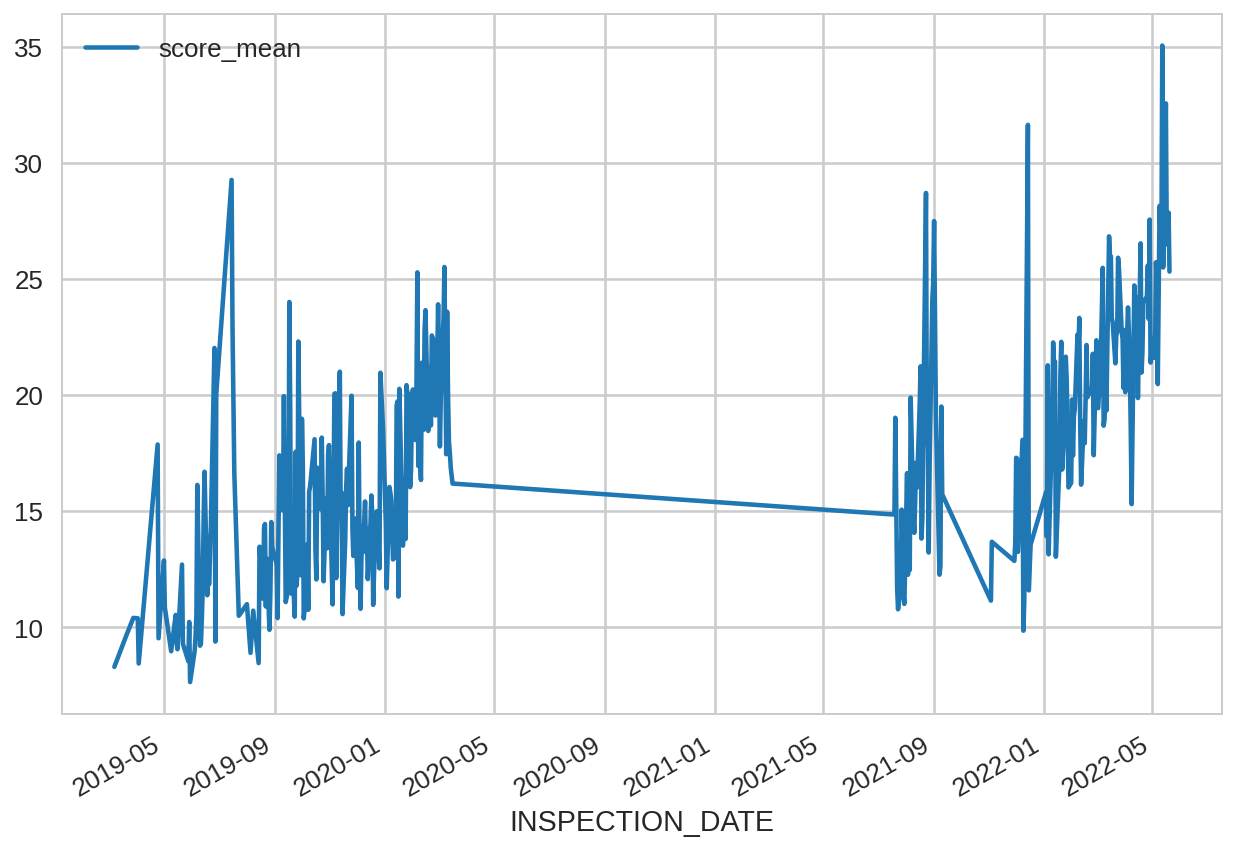

In [67]:
(
  inspections
  .groupby('INSPECTION_DATE')
  .agg(
      score_mean = ('SCORE', 'mean'), # calculate the aveage score for the date
      graded_restaurants = ('CAMIS', 'nunique') # and the number of restaurants
    )
  .query('graded_restaurants>10') # keep only days with at least 10 graded restauranta
  .filter(items=['score_mean']) # we only want to plot the score
  .plot()
)

## Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [104]:
# Count the number of CAMIS values that appear on each date

pivot = pd.pivot_table(
    data=inspections,
    index="INSPECTION_DATE",  # specifies the rows
    values="CAMIS",  # specifies the content of the cells
    aggfunc="count",  # we ask to count how many different CAMIS values we see
)

In [69]:
pivot

,CAMIS
INSPECTION_DATE,
2015-10-03,1
2017-09-23,2
2017-10-20,2
2017-12-16,3
2018-03-27,3
...,...
2022-05-16,412
2022-05-17,388
2022-05-18,380


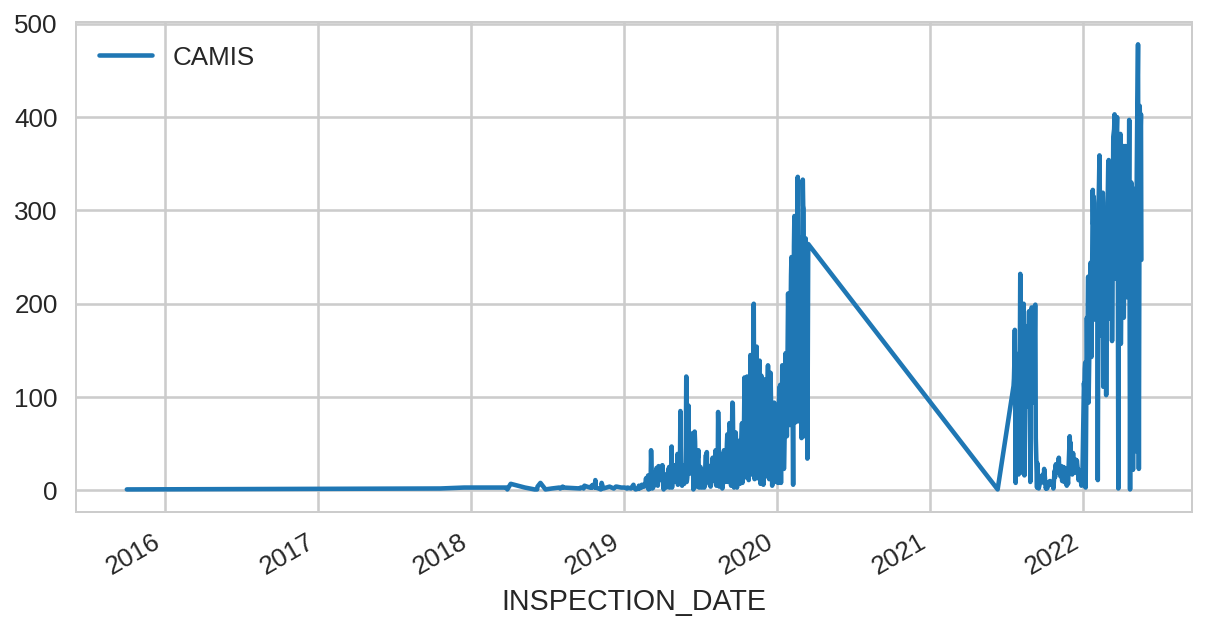

In [70]:
pivot.plot(figsize=(10, 5))

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

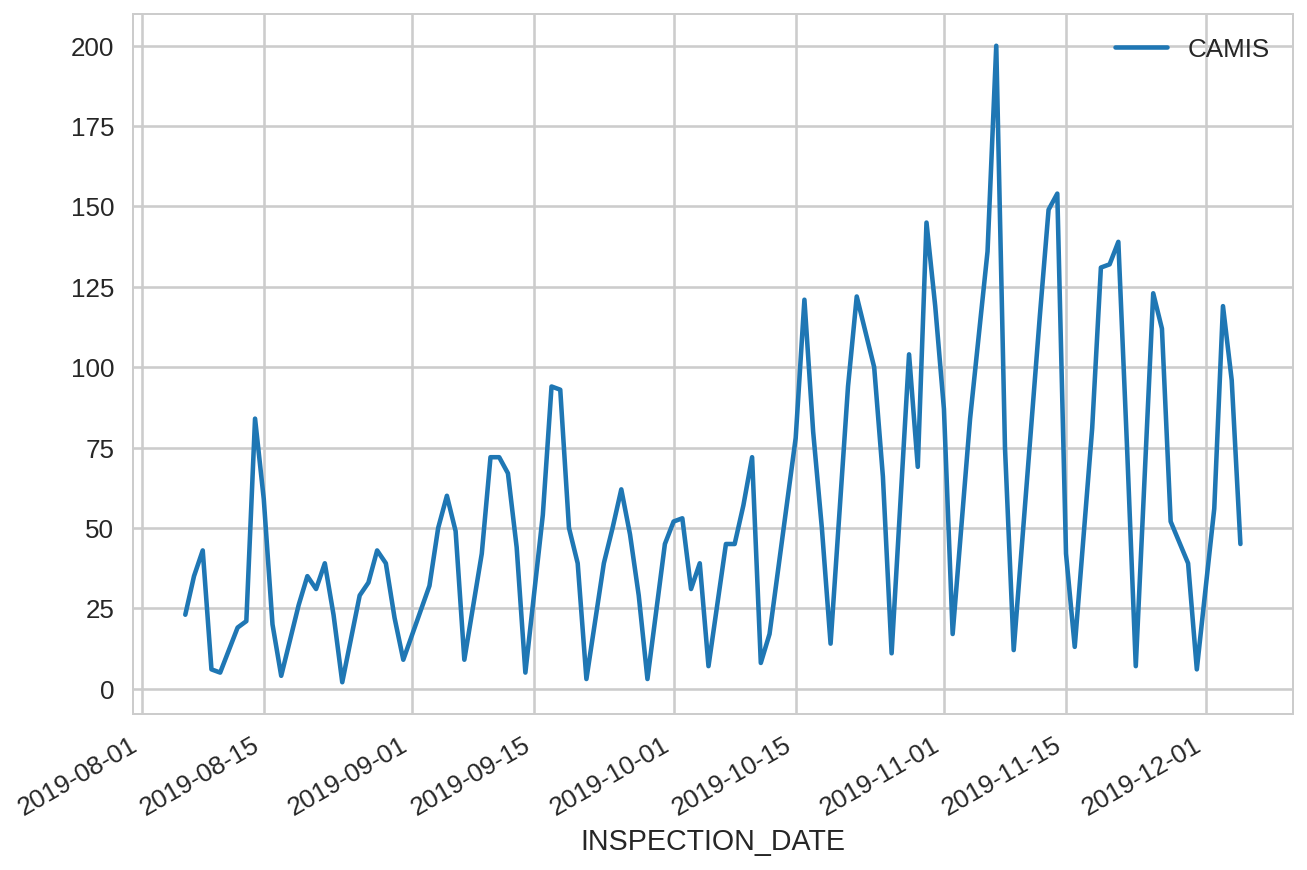

In [71]:
pivot[200:300].plot()

### Exercise 1 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [ ]:
# your code here

#### Solution

In [105]:
pivot = pd.pivot_table(
    data=inspections,
    index="INSPECTION_DATE",  # specifies the rows
    values="SCORE",  # specifies the content of the cells
    aggfunc="mean",  # compute the average SCORE
)

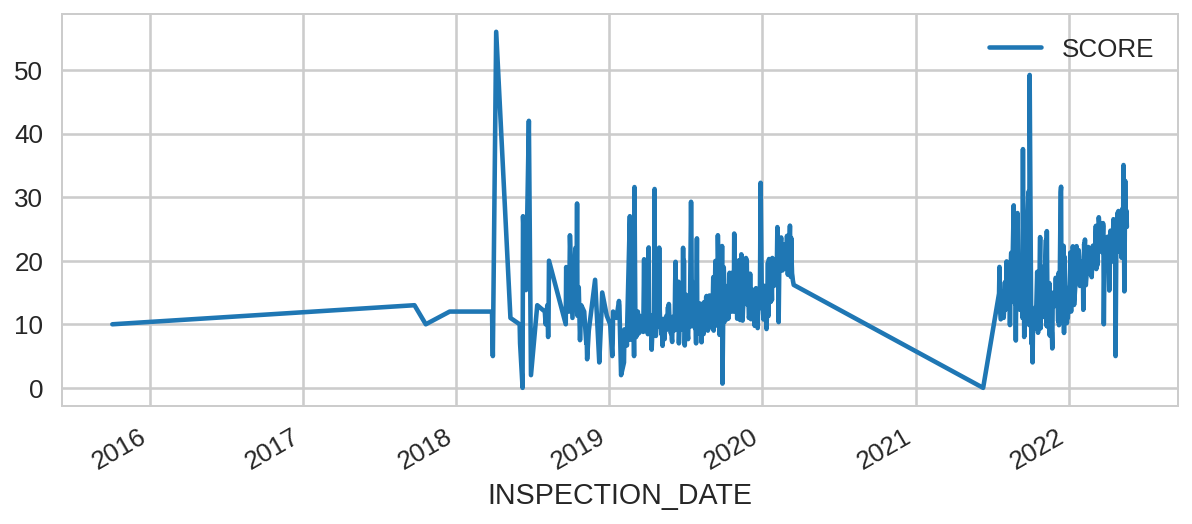

In [106]:
pivot.plot(figsize=(10, 4))

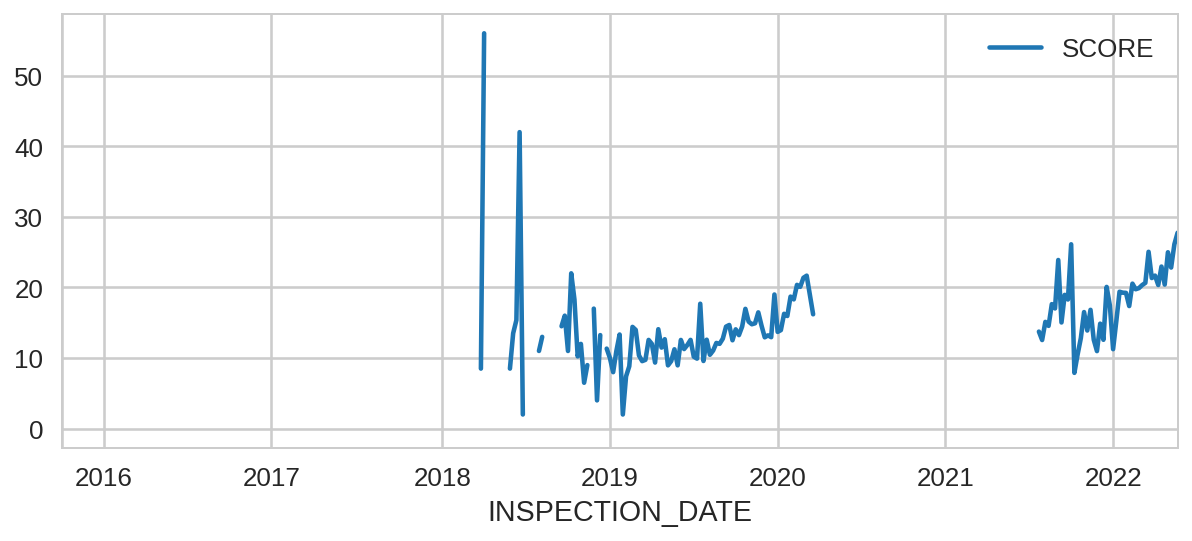

In [107]:
pivot.resample("1W").mean().plot(figsize=(10, 4))

#### Changing date granularity 

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [111]:
pivot = pd.pivot_table(
    data=inspections,
    index="INSPECTION_DATE",  # specifies the rows
    values="CAMIS",  # specifies the content of the cells
    aggfunc="count",  # we ask to count how many different CAMIS values we see
)

pivot.resample("1W").sum()

,CAMIS
INSPECTION_DATE,
2015-10-04,1
2015-10-11,0
2015-10-18,0
2015-10-25,0
2015-11-01,0
...,...
2022-04-24,1505
2022-05-01,1439
2022-05-08,1199


Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

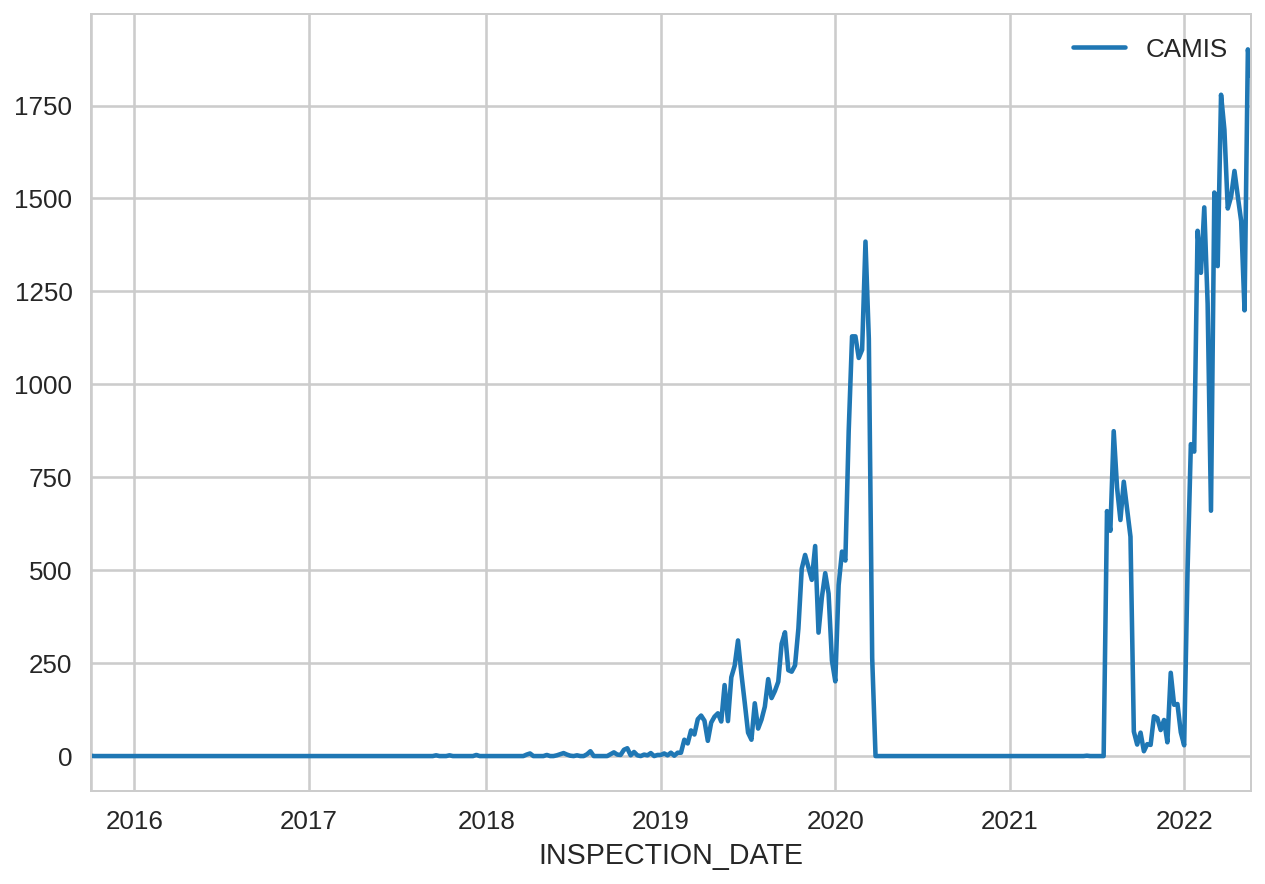

In [113]:
# Plot the average number of inspections, over 7-day periods
pivot.resample("1W").sum().plot()

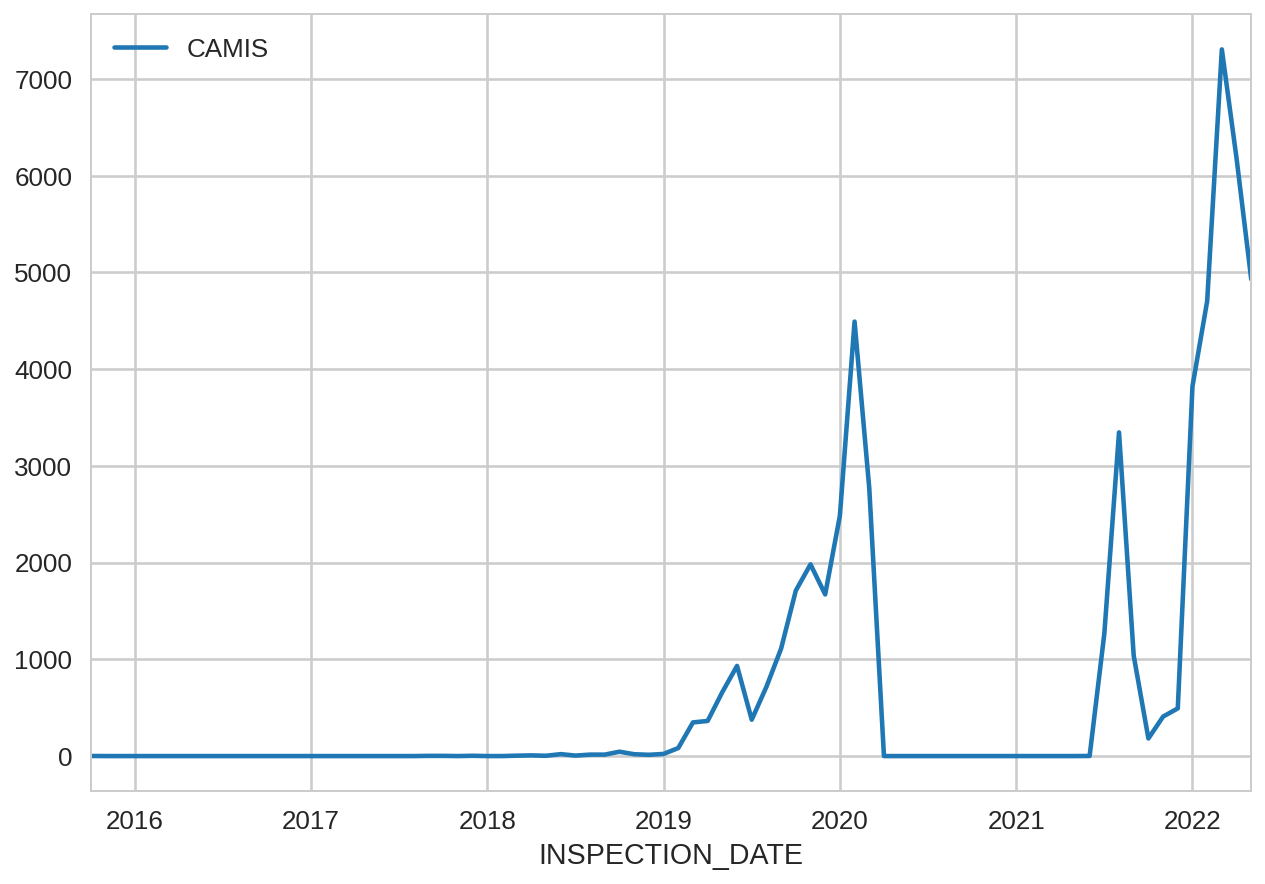

In [114]:
# Plot the total number of inspections, over 1-month periods
pivot.resample("1M").sum().plot()

Text(0.5, 1.0, 'Analysis of Number of Inspections over Time')

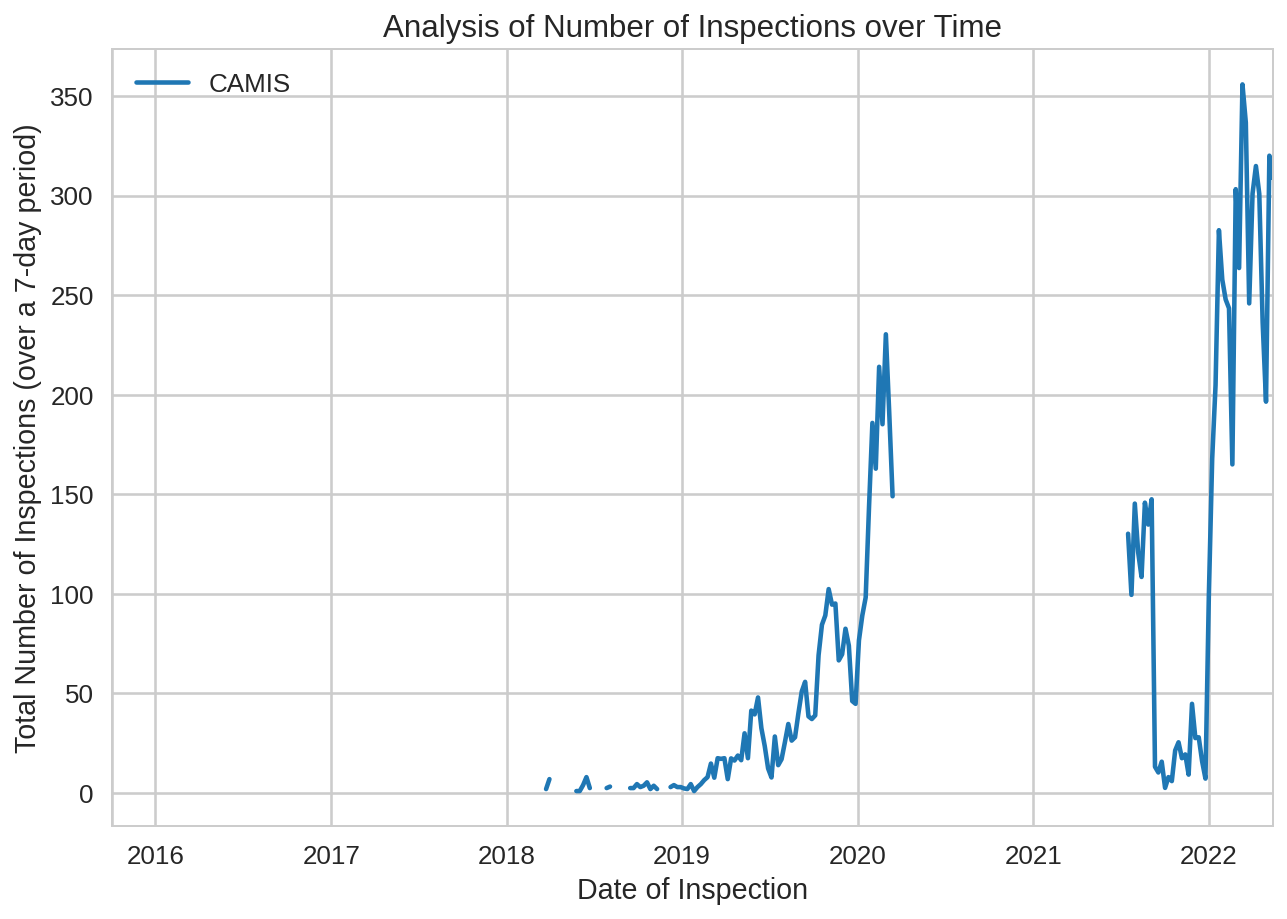

In [117]:
plot = pivot.resample("7D").mean().plot()
plot.set_xlabel("Date of Inspection")
plot.set_ylabel("Total Number of Inspections (over a 7-day period)")
plot.set_title("Analysis of Number of Inspections over Time")

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [76]:
pivot2 = pd.pivot_table(
    data=inspections,  #
    index="INSPECTION_DATE",
    columns="BORO",
    values="CAMIS",
    aggfunc="count",
)
pivot2.head(10)

BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island
INSPECTION_DATE,,,,,
2015-10-03,NaN,NaN,1.0,NaN,NaN
2017-09-23,NaN,2.0,NaN,NaN,NaN
2017-10-20,2.0,NaN,NaN,NaN,NaN
2017-12-16,NaN,NaN,NaN,3.0,NaN
2018-03-27,NaN,NaN,3.0,NaN,NaN
2018-03-29,NaN,1.0,NaN,NaN,NaN
2018-04-06,7.0,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,3.0,NaN
2018-06-01,NaN,NaN,NaN,NaN,1.0


In [77]:
pivot2.tail(5)

BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island
INSPECTION_DATE,,,,,
2022-05-16,39.0,194.0,95.0,84.0,NaN
2022-05-17,28.0,103.0,123.0,105.0,29.0
2022-05-18,12.0,130.0,146.0,84.0,8.0
2022-05-19,56.0,127.0,120.0,93.0,7.0
2022-05-20,21.0,98.0,56.0,67.0,5.0


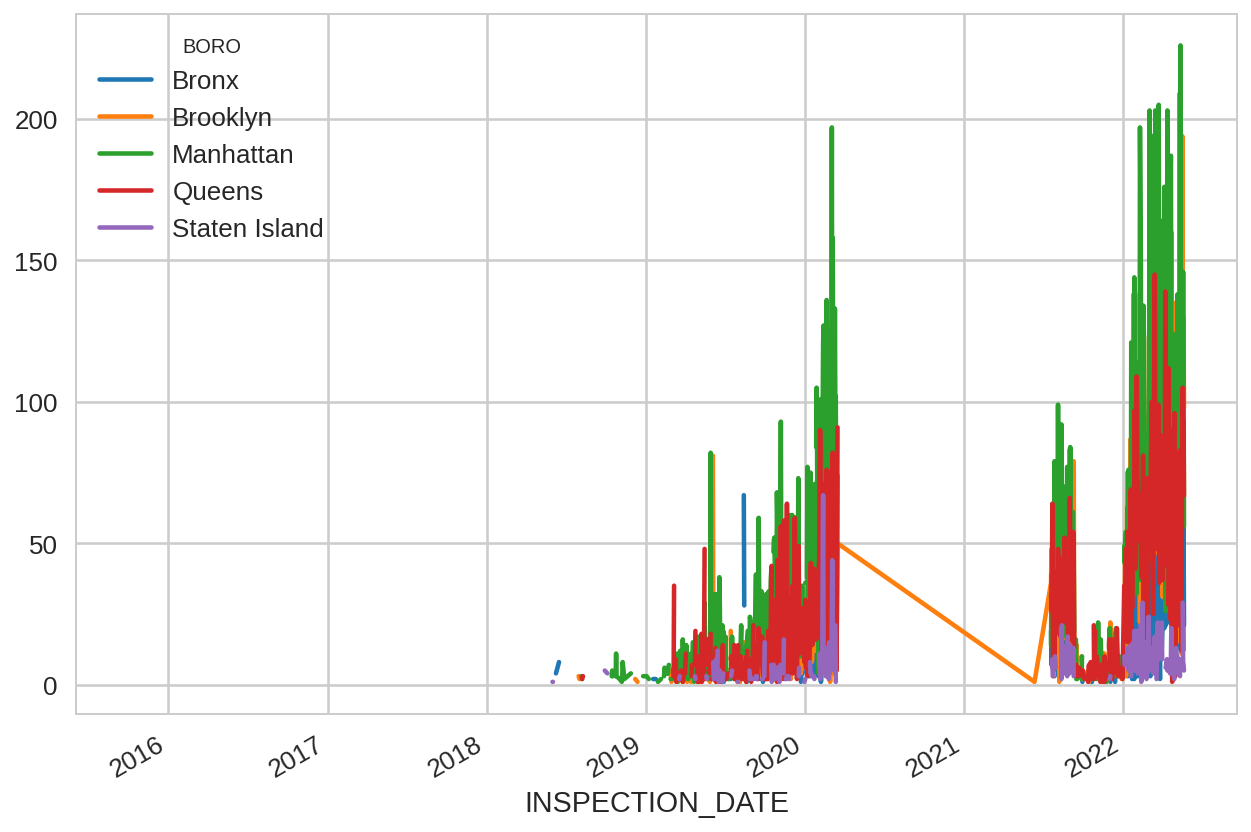

In [78]:
pivot2.plot()

In [79]:
# We resample the index, to keep only dates every one month
# For that one month period, we compute the average value
pivot2.resample("1M").mean().tail(10)

BORO,Bronx,Brooklyn,Manhattan,Queens,Staten Island
INSPECTION_DATE,,,,,
2021-08-31,13.095238,39.240000,52.636364,32.956522,9.666667
2021-09-30,13.800000,19.000000,24.785714,16.285714,10.000000
2021-10-31,3.833333,4.625000,4.200000,5.571429,2.000000
2021-11-30,5.000000,5.947368,7.705882,5.833333,3.000000
2021-12-31,3.625000,10.263158,8.062500,7.105263,2.500000
2022-01-31,17.473684,62.000000,64.894737,46.052632,8.875000
2022-02-28,24.789474,63.105263,93.368421,54.631579,11.631579
2022-03-31,25.583333,84.869565,129.695652,68.173913,10.500000
2022-04-30,31.666667,72.090909,115.619048,59.304348,8.562500


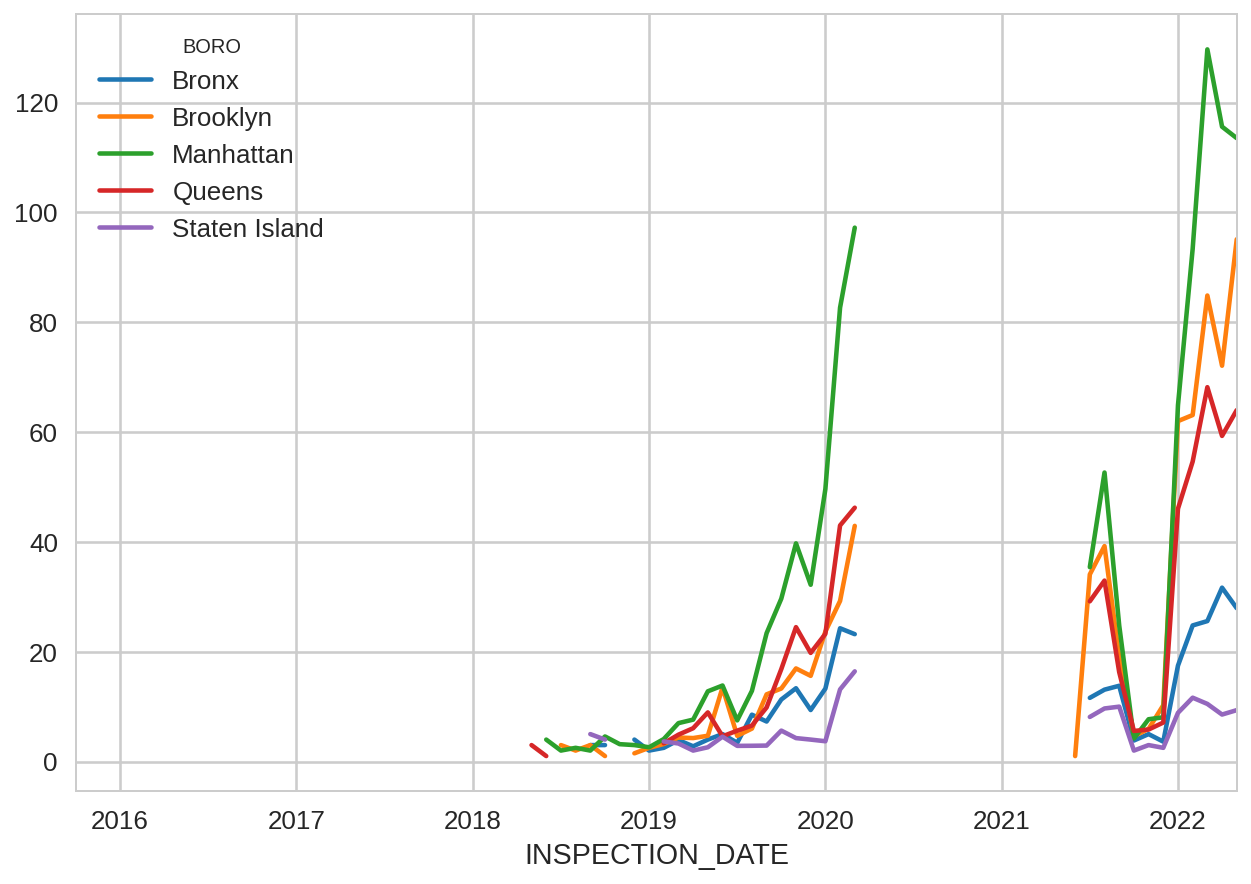

In [80]:
# If we plot a dataframe then by default the index column
# in our case the INSPECTION DATE becomes the x-asis
# and all the columns become separate lines in the plot
pivot2.resample("1M").mean().plot()

# Potential Exercise, if we have time:
# Drop the last date, which corresponds to an incomplete month

## (Optional, FYI) Advanced Pivot Tables

We can also add multiple attributes in the index and columns. It is also possible to have multiple aggregation functions, and we can even define our own aggregation functions.

In [118]:
# We write a function that returns the
# number of unique items in a list x
def count_unique(x):
    return len(set(x))


# We break down by BORO and GRADE, and also calculate
# inspections in unique (unique restaurants)
# and non-unique entries (effectuvely, violations)
pivot_advanced = pd.pivot_table(
    data=inspections,  #
    index="INSPECTION_DATE",
    columns=["BORO", "GRADE"],
    values="CAMIS",
    aggfunc=["count", count_unique],
)

# Take the total number of inspections (unique and non-unique)
agg = pivot_advanced.resample("1M").sum()

# Show the last 5 entries and show the transpose (.T)
agg.tail().T

INSPECTION_DATE                   2022-01-31  2022-02-28  2022-03-31  \
             BORO          GRADE                                       
count        Bronx         A           184.0       185.0       251.0   
                           B            50.0        54.0        27.0   
                           C            10.0         0.0         5.0   
             Brooklyn      A           733.0       532.0       767.0   
                           B           142.0        88.0       118.0   
                           C            44.0        51.0        29.0   
             Manhattan     A           739.0       856.0      1246.0   
                           B            96.0        99.0        90.0   
                           C            69.0        34.0        44.0   
             Queens        A           479.0       505.0       724.0   
                           B           100.0        85.0        60.0   
                           C            56.0        30.0        70.0   
             Staten Island A           106.0       126.0       111.0   
                           B             9.0        14.0         7.0   
                           C             0.0        10.0         0.0   
count_unique Bronx         A            83.0        87.0       116.0   
                           B            12.0        14.0         8.0   
                           C             2.0         0.0         1.0   
             Brooklyn      A           339.0       250.0       368.0   
                           B            33.0        21.0        31.0   
                           C             7.0         9.0         5.0   
             Manhattan     A           342.0       421.0       602.0   
                           B            23.0        26.0        21.0   
                           C            10.0         5.0         8.0   
             Queens        A           223.0       233.0       320.0   
                           B            23.0        22.0        15.0   
                           C             9.0         5.0        11.0   
             Staten Island A            46.0        54.0        47.0   
                           B             3.0         5.0         2.0   
                           C             0.0         2.0         0.0   

INSPECTION_DATE                   2022-04-30  2022-05-31  
             BORO          GRADE                          
count        Bronx         A           251.0       103.0  
                           B             6.0         0.0  
                           C             0.0         0.0  
             Brooklyn      A           618.0       491.0  
                           B            17.0         0.0  
                           C             8.0         0.0  
             Manhattan     A          1030.0       554.0  
                           B            15.0         0.0  
                           C            14.0         0.0  
             Queens        A           517.0       351.0  
                           B            10.0         0.0  
                           C             5.0         0.0  
             Staten Island A            75.0        62.0  
                           B             0.0         0.0  
                           C             0.0         0.0  
count_unique Bronx         A           119.0        42.0  
                           B             2.0         0.0  
                           C             0.0         0.0  
             Brooklyn      A           286.0       238.0  
                           B             4.0         0.0  
                           C             2.0         0.0  
             Manhattan     A           493.0       257.0  
                           B             3.0         0.0  
                           C             3.0         0.0  
             Queens        A           241.0       160.0  
                           B             3.0         0.0  
                           C             1.



### Exercise 2

We now want to examine if different cuisines have different inspection scores. Compute the average inspection score by cuisine. Use the `sort_values()` command ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)) to order cuisines by their inspection scores.

In [ ]:
# your code here

#### Solution

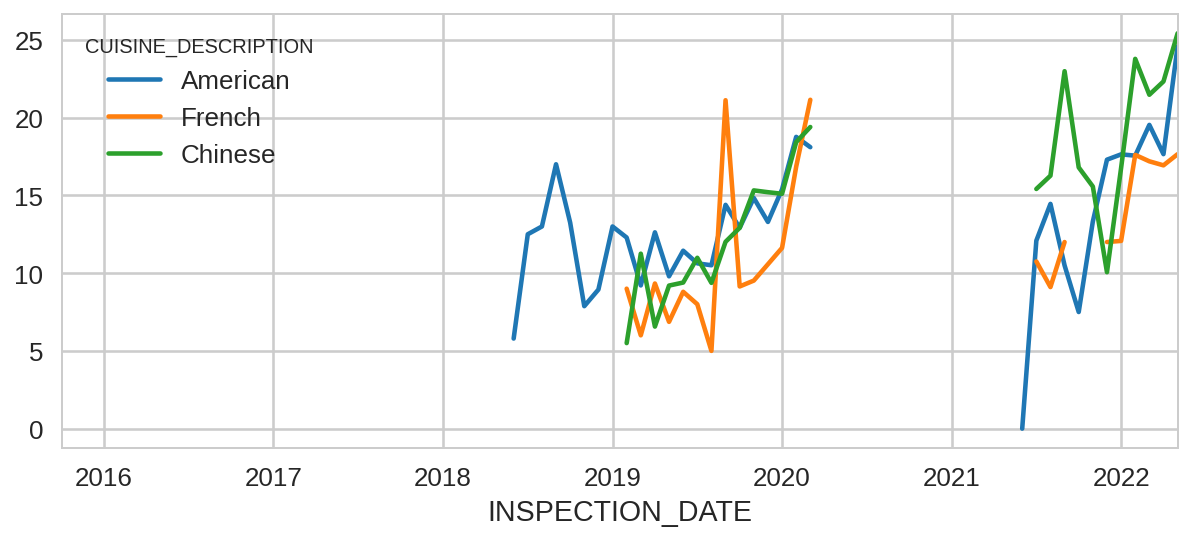

In [120]:
merged = pd.merge(restaurants, inspections, on = 'CAMIS')


pivot = pd.pivot_table(
    data=merged,
    index="INSPECTION_DATE",  # dates are the rows
    columns="CUISINE_DESCRIPTION",  # cuisines are the columns
    values="SCORE",  # we analyze the SCORE
    aggfunc="mean",  # compute the average SCORE
)
# Select 3 columns (american, frenchn, chinese), compute the average score for a month
# and plot the results
pivot[["American", "French", "Chinese"]].resample("1M").mean().plot(figsize=(10, 4))